# Assignment 01 – Generative and Non-Generative Methods

#### Group 2 - Eric Lim - ml1859
#### Group 2 - Klass van Kempen - kjv13
#### Group 2 - Jude Moukarzel - jjm385

# Initialization 

## Load the dataset. (0.5 x 2)

In [1]:
import urllib.request
url_g2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
filename_g2 = '../datasets/online_shoppers_intention.csv'
urllib.request.urlretrieve(url_g2, filename_g2)

('../datasets/online_shoppers_intention.csv',
 <http.client.HTTPMessage at 0x25dd51bbd30>)

## Show first 6 data points using head(). (0.5 x 2)

In [2]:
import pandas as pd

#Reading in dataset
filename_g2 = '../datasets/online_shoppers_intention.csv'
OSI_g2 = pd.read_csv(filename_g2, header=0)

#Converting to Integer
OSI_g2["Weekend"] = OSI_g2["Weekend"].astype(int)
OSI_g2["Revenue"] = OSI_g2["Revenue"].astype(int)

#Adding a numeric version of visitor type and dropping original column
OSI_g2.insert(loc=16, column="VisitorTypeNumeric", value=pd.factorize(OSI_g2['VisitorType'])[0] + 1)
OSI_g2 = OSI_g2.drop('VisitorType', axis=1)

#Printing data set
OSI_g2.head(6)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,1,0,0


## Describe the Dataframe by using describe. (0.5 x 2) 

In [3]:
OSI_g2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


Fixing column names to remove the _ and renaming column

In [4]:
#Renaming columns
new_col_names_g2 = {
    'Administrative_Duration' : 'AdministrativeDuration',
    'Informational_Duration' : 'InformationalDuration',
    'ProductRelated_Duration' : 'ProductRelatedDuration'
}

OSI_g2.rename(columns=new_col_names_g2, inplace=True)

## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

First off, let's convert the months to a numeric format

In [5]:
#Converting Months
month_numeric_encoding_g2 = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4,
    "May": 5, "Jun": 6, "Jul": 7, "Aug": 8,
    "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}

OSI_g2["Month"] = OSI_g2["Month"].map(month_numeric_encoding_g2)

Next, we can create a heatmap as follows:

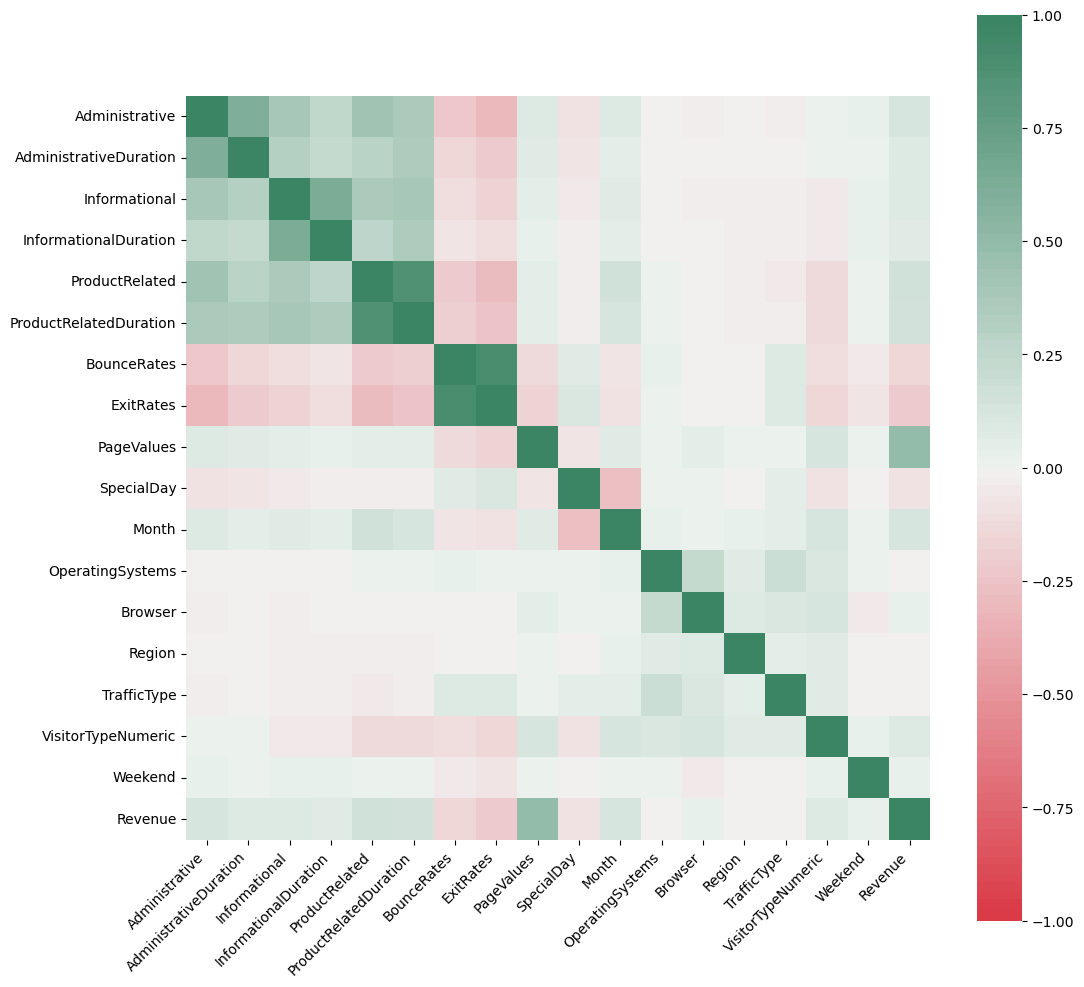

In [6]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr_g2 = OSI_g2.corr()
ax_g2 = sns.heatmap(
    corr_g2, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 150, n=100),
    square=True
)
ax_g2.set_xticklabels(
    ax_g2.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Show the distribution plots of each variable using hist function from matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. You can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.”* (0.5 x 2) 


<Figure size 2340x2340 with 0 Axes>

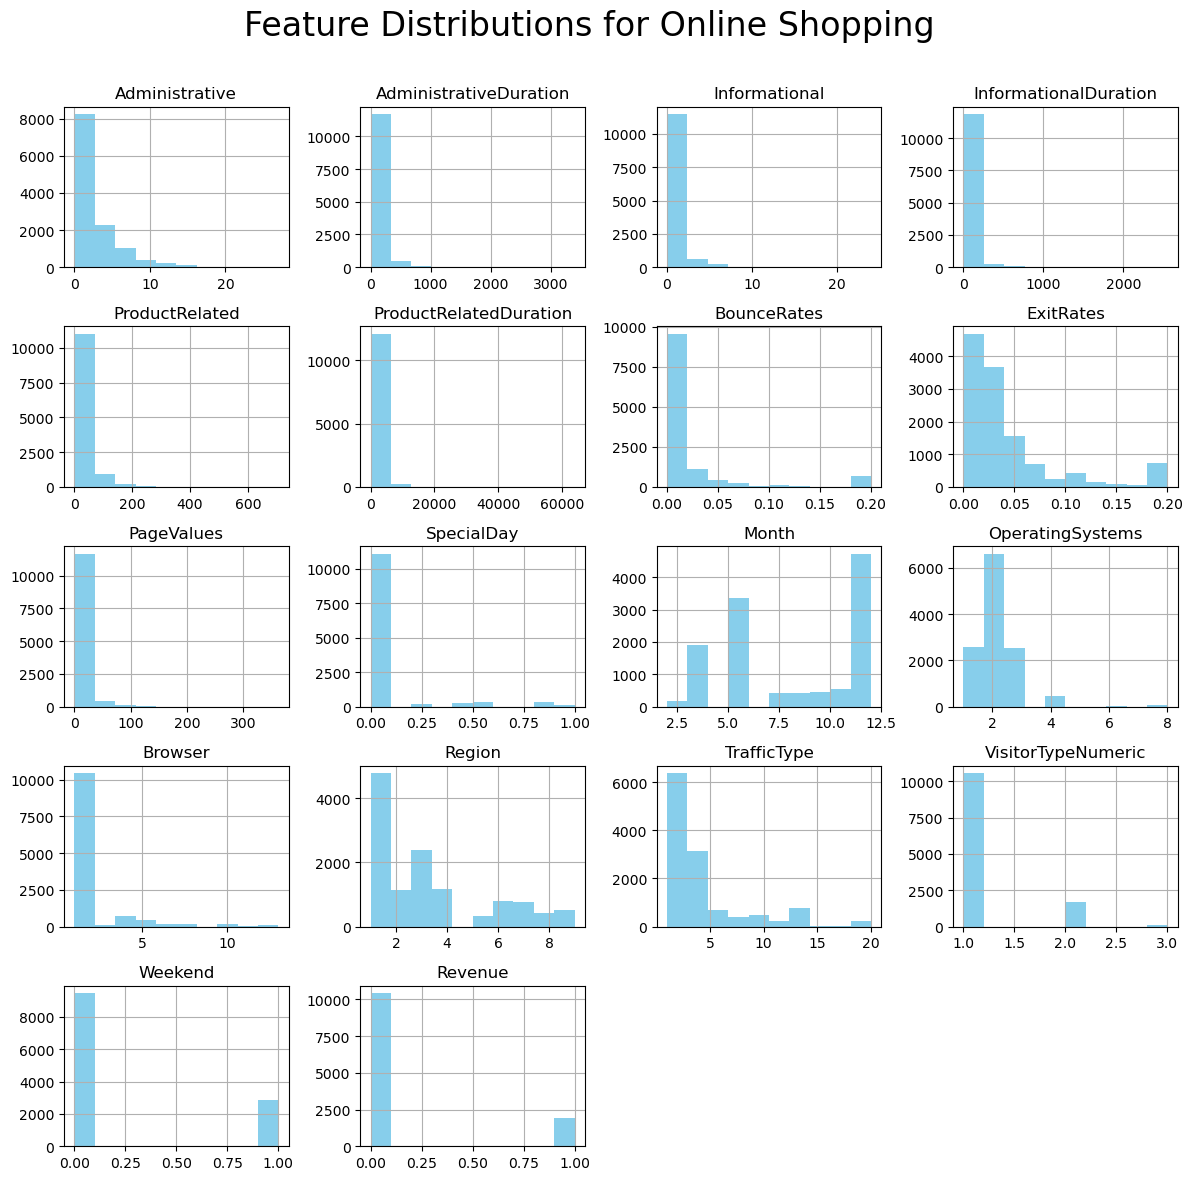

In [7]:
import matplotlib.pyplot as plt

#Converting following variables to an object type
OSI_g2[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorTypeNumeric', 'Weekend', 'Revenue']].astype(object)

plt.figure(figsize=(13, 13),dpi=180)
OSI_g2.hist(color='skyblue', rwidth=1)
plt.suptitle("Feature Distributions for Online Shopping \n", size=24)
plt.tight_layout()

### Interpretation:

The features indicating the various types of pages visited by a user (Administrative, Informational, and ProductRelated) exhibit a skewed distribution to the right. This suggests that the median and interquartile range (IQR) are more appropriate central tendency measures for describing user behavior. Specifically, these features have medians of 1, 0, and 0, and IQRs of 4, 0, and 31, respectively.

Similarly, the features measuring the time spent on these three types of pages (AdministrativeDuration, InformationalDuration, and ProductRelatedDuration) also display right-skewed distributions. Their respective medians are 7.5, 0, and 598.94, and their IQRs are 93.26, 0, and 1280.02.

Additionally, the metrics from "Google Analytics" (BounceRates, ExitRates, and PageValues) also exhibit a right-skewed pattern. Their medians are 0.003, 0.025, and 0, with IQRs of 0.017, 0.036, and 0, respectively.

Lastly, the SpecialDay feature, which indicates the proximity of the browsing date to special days or holidays, unsurprisingly follows a right-skewed distribution. It has a median of 0 and an IQR of 1.

# Further Analysis

In [8]:
month_vc = OSI_g2['Month'].value_counts()
month_perc = (month_vc / len(OSI_g2)) * 100
print(month_perc)

5.0     27.283049
11.0    24.314680
3.0     15.466342
12.0    14.006488
10.0     4.452555
9.0      3.633414
8.0      3.511760
7.0      3.503650
2.0      1.492295
Name: Month, dtype: float64


In [9]:
os_vc = OSI_g2['OperatingSystems'].value_counts()
os_perc = (os_vc / len(OSI_g2)) * 100
print(os_perc)

2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: OperatingSystems, dtype: float64


In [10]:
browser_vc = OSI_g2['Browser'].value_counts()
browser_perc = (browser_vc / len(OSI_g2)) * 100
print(browser_perc)

2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: Browser, dtype: float64


In [11]:
reg_vc = OSI_g2['Region'].value_counts()
reg_perc = (reg_vc / len(OSI_g2)) * 100
print(reg_perc)

1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: Region, dtype: float64


In [12]:
tt_vc = OSI_g2['TrafficType'].value_counts()
tt_perc = (tt_vc / len(OSI_g2)) * 100
print(tt_perc)

2     31.735604
1     19.878345
3     16.642336
4      8.669911
13     5.985401
10     3.649635
6      3.600973
8      2.781833
5      2.108678
11     2.003244
20     1.605839
9      0.340633
7      0.324412
15     0.308191
19     0.137875
14     0.105434
18     0.081103
16     0.024331
12     0.008110
17     0.008110
Name: TrafficType, dtype: float64


In [13]:
vtn_vc = OSI_g2['VisitorTypeNumeric'].value_counts()
vtn_perc = (vtn_vc / len(OSI_g2)) * 100
print(vtn_perc)

1    85.571776
2    13.738848
3     0.689376
Name: VisitorTypeNumeric, dtype: float64


In [14]:
weekend_vc = OSI_g2['Weekend'].value_counts()
weekend_perc = (weekend_vc / len(OSI_g2)) * 100
print(weekend_perc)

0    76.739659
1    23.260341
Name: Weekend, dtype: float64


In [15]:
rev_vc = OSI_g2['Revenue'].value_counts()
rev_perc = (rev_vc / len(OSI_g2)) * 100
print(rev_perc)

0    84.525547
1    15.474453
Name: Revenue, dtype: float64


### Interpretation

The region most frequently associated with users participating in online shopping sessions is represented by code 1 (39%), followed by code 3 at 20%.

Among users participating in online shopping sessions, the most common operating system is represented by code 2 (54%), followed by codes 1 and 3, both at 21%.

The most common TrafficType used by users engaging in online shopping sessions is encoded as 2 (32%), followed by codes 1 (20%) and 3 (17%).

The most prevalent browser among users participating in online shopping sessions is represented by code 2 (65%), followed by code 1 at 20%.

The months when users engage in online shopping sessions most frequently are May (27%), November (24%), March (15%), and December (14%). It's worth noting that May stands out because it has Memorial Day as its only public holiday, which isn't typically associated with shopping compared to holidays like Thanksgiving, Mother's Day, and Christmas that fall in November, March, and December.

Online shopping sessions predominantly take place on weekdays (77%), and a majority of these sessions (85%) do not result in a completed purchase.

Finally, among users involved in online shopping sessions, approximately 86% are returning users, while 14% are new visitors.

## Load the dataset. (0.5 x 2)

In [16]:
import pandas as pd
filename_g2 = '../datasets/Bike-Sharing-Hour.csv'
BSH_g2 = pd.read_csv(filename_g2, header=0)

## Show first 6 data points using head(). (0.5 x 2)

In [17]:
BSH_g2.head(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


## Describe the Dataframe by using describe. (0.5 x 2) 

In [18]:
BSH_g2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

Let's drop the column "dteday" as it is not needed for our analysis.

In [19]:
BSH_g2.drop(columns=['dteday'], inplace=True)

Next, we can rename the columns for more efficient use of our variables.

In [20]:
#Renaming columns
BSH_g2.rename(columns={
    'instant' : 'Instant',
    'season' : 'Season',
    'yr' : 'Year',
    'mnth' : 'Month',
    'hr' : 'Hour',
    'holiday' : 'Holiday',
    'weekday' : 'Weekday',
    'workingday' : 'WorkingDay',
    'weathersit' : 'Weather',
    'temp' : 'Temperature',
    'atemp' : 'FeelingTemperature',
    'hum' : 'Humidity',
    'windspeed' : 'WindSpeed',
    'casual' : 'CasualCount',
    'registered' : 'RegisteredCount',
    'cnt' : 'RentalCount'
}, inplace=True)

Finally, we can plot the heat map:

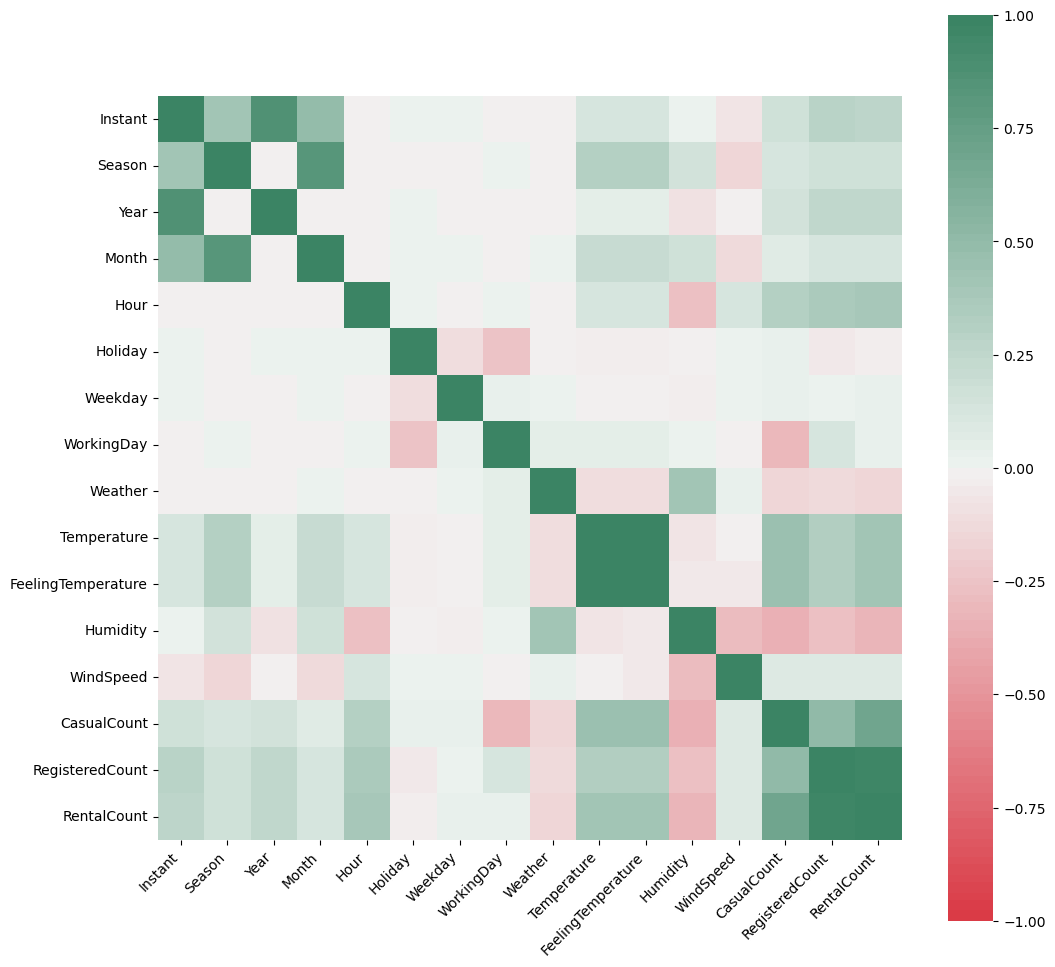

In [21]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr_g2 = BSH_g2.corr()
ax_g2 = sns.heatmap(
    corr_g2, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 150, n=100),
    square=True
)
ax_g2.set_xticklabels(
    ax_g2.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Show the distribution plots of each variable using hist function from matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. You can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.”* (0.5 x 2) 


<Figure size 2340x2340 with 0 Axes>

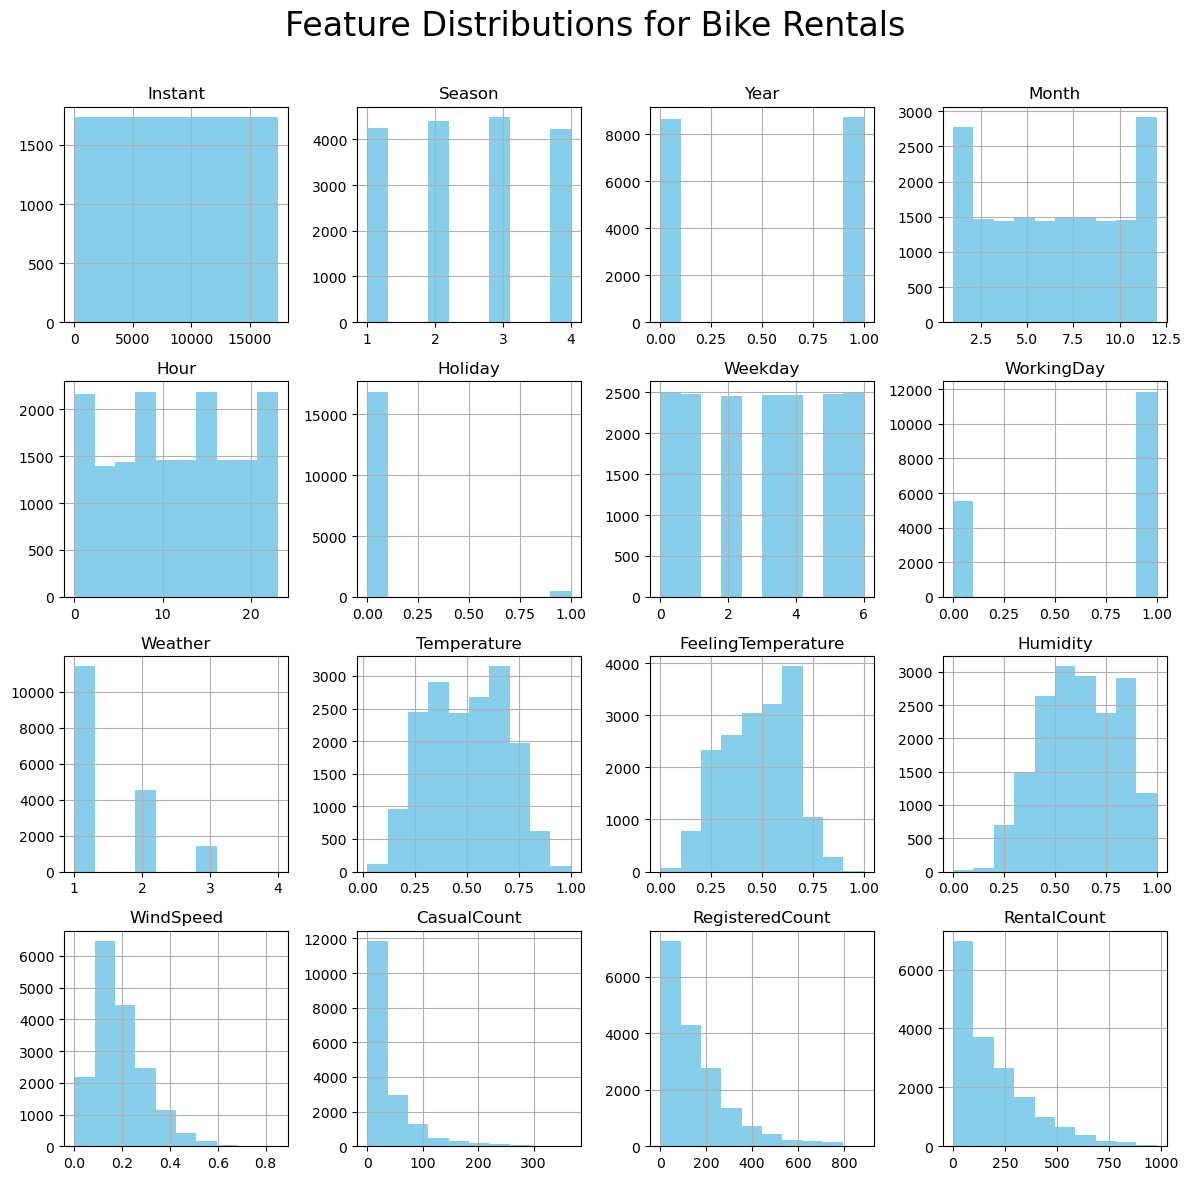

In [22]:
import matplotlib.pyplot as plt

#Converting variables to object type
BSH_g2[['Instant', 'Season', 'Year', 
     'Month', 'Hour', 'Holiday', 
     'Weekday', 'WorkingDay', 'Weather']].astype(object)

plt.figure(figsize=(13, 13),dpi=180)
BSH_g2.hist(color='skyblue', rwidth=1)
plt.suptitle("Feature Distributions for Bike Rentals\n", size=24)
plt.tight_layout()

### Interpretation: 

Features related to the number of bike rentals, such as CasualCount, RegisteredCount, and RentalCount, display a right-skewed distribution. This implies that utilizing the median and IQR as central tendency measures is preferable for analyzing bike rental data. These features have medians of 17, 115, and 142, along with IQRs of 44, 186, and 241.  
When we consider climate-related metrics like Humidity and WindSpeed, there is a slight left-skew in the case of Humidity and a right-skew in the case of WindSpeed. This suggests that using the median and Interquartile Range (IQR) as central tendency measures may be more appropriate for climate data. Specifically, Humidity has a median of 0.63 and an IQR of 0.30, while WindSpeed has a median of 0.19 and an IQR of 0.15. It's worth noting that these features have been normalized by dividing them by their respective maximum raw values.  
The characteristics related to temperature, namely Temperature and FeelingTemperature, exhibit an approximately normal distribution. This indicates that using the mean and standard deviation as measures of central tendencies for weather data is reasonable. These features have mean values of 0.50 and 0.48, along with standard deviations of 0.19 and 0.17. It's important to note that these temperature measurements are in Celsius and have been normalized using the min-max method.  

# Further Analysis

In [23]:
season_vc = BSH_g2['Season'].value_counts()
season_perc = (season_vc / len(BSH_g2)) * 100
print(season_perc)

3    25.870303
2    25.369699
1    24.408769
4    24.351228
Name: Season, dtype: float64


In [24]:
year_vc = BSH_g2['Year'].value_counts()
year_perc = (year_vc / len(BSH_g2)) * 100
print(year_perc)

1    50.256056
0    49.743944
Name: Year, dtype: float64


In [25]:
month_vc = BSH_g2['Month'].value_counts()
month_perc = (month_vc / len(BSH_g2)) * 100
print(month_perc)

5     8.562058
7     8.562058
12    8.533287
8     8.487255
3     8.475747
10    8.349157
6     8.285862
4     8.268600
9     8.268600
11    8.268600
1     8.222567
2     7.716209
Name: Month, dtype: float64


In [26]:
hour_vc = BSH_g2['Hour'].value_counts()
hour_perc = (hour_vc / len(BSH_g2)) * 100
print(hour_perc)

17    4.200472
16    4.200472
13    4.194718
15    4.194718
14    4.194718
12    4.188964
22    4.188964
21    4.188964
20    4.188964
19    4.188964
18    4.188964
23    4.188964
11    4.183210
10    4.183210
9     4.183210
8     4.183210
7     4.183210
0     4.177456
6     4.171701
1     4.165947
5     4.125669
2     4.114161
4     4.010587
3     4.010587
Name: Hour, dtype: float64


In [27]:
holiday_vc = BSH_g2['Holiday'].value_counts()
holiday_perc = (holiday_vc / len(BSH_g2)) * 100
print(holiday_perc)

0    97.122964
1     2.877036
Name: Holiday, dtype: float64


In [28]:
weekday_vc = BSH_g2['Weekday'].value_counts()
weekday_perc = (weekday_vc / len(BSH_g2)) * 100
print(weekday_perc)

6    14.454226
0    14.396686
5    14.310375
1    14.264342
3    14.241326
4    14.218309
2    14.114736
Name: Weekday, dtype: float64


In [29]:
wd_vc = BSH_g2['WorkingDay'].value_counts()
wd_perc = (wd_vc / len(BSH_g2)) * 100
print(wd_perc)

1    68.272052
0    31.727948
Name: WorkingDay, dtype: float64


In [30]:
weather_vc = BSH_g2['Weather'].value_counts()
weather_perc = (weather_vc / len(BSH_g2)) * 100
print(weather_perc)

1    65.671212
2    26.146499
3     8.165027
4     0.017262
Name: Weather, dtype: float64


### Interpretation:

First off, a significant portion of bike rentals (97%) does not take place on holidays, suggesting that the majority of these rentals are likely used for commuting to work.
Next, it looks like the most common weather conditions during bike rentals are clear skies (66%), followed by misty weather (26%) and light snow (8%).

As for bike rentals, they were evenly distributed across seasons, months, and hours of the day for both 2011 and 2012. It's important to note that the distributions for Month and Hour may be somewhat misleading, possibly due to the way the data was grouped into bins.  
While bike rentals are evenly spread throughout all days of the week, the majority (68%) of rentals occur on weekdays, which corresponds with the observation regarding the Holiday feature.

# Intermediate Steps (Essential, no points granted)

**First, we need to impute missing values before proceeding with train/test**

In [31]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='most_frequent')
OSI_imputed = pd.DataFrame(imputer.fit_transform(OSI_g2), columns=OSI_g2.columns)

In [32]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

X_OSI_g2 = OSI_imputed.loc[:, OSI_g2.columns != 'Revenue'].to_numpy()
y_OSI_g2 = OSI_imputed.iloc[:,-1:].to_numpy()

#print(X_OSI_g2)
#print(y_OSI_g2)

OSIX_train_g2, OSIX_test_g2, OSIy_train_g2, OSIy_test_g2 = train_test_split(X_OSI_g2, y_OSI_g2, test_size=0.30, random_state=250)

In [33]:
X_BSH_g2 = BSH_g2.loc[:, BSH_g2.columns != 'RentalCount'].to_numpy()
y_BSH_g2 = BSH_g2.iloc[:,-1:].to_numpy()

#print(X_BSH_g2)
#print(y_BSH_g2)

BSHX_train_g2, BSHX_test_g2, BSHy_train_g2, BSHy_test_g2 = train_test_split(X_BSH_g2, y_BSH_g2, test_size=0.30, random_state=250)

# Classification (total 48)
## AdaBoost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

Import AdaBoostClassifier from scikit-learn.

In [34]:
from sklearn.ensemble import AdaBoostClassifier

### Create the appropriate classifier, describe what the syntax represents, and what parameters you chose. (1.5)

Create a variable `clf_g2` to instantiate the AdaBoostClassifier model. `n_estimators` represents the number of base estimators (which are decision trees of depth of 1) and a `random_state` of 250 (picked randomly).

In [35]:
clf_g2 = AdaBoostClassifier(n_estimators=100, random_state=250)

### Train classifier on train data and explain what you did. (1.5) 

Creating a new variable `ada_fit_g2` that represents the fitted AdaBoostClassifier model. 

In [36]:
ada_fit_g2 = clf_g2.fit(OSIX_train_g2, OSIy_train_g2)

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Test/fit classifier test data and explain what you did. (1.5)

Store predicted target values in variable `OSIy_pred_g2`.

In [37]:
OSIy_pred_g2 = ada_fit_g2.predict(OSIX_test_g2)

### Calculate accuracy and explain what you did. (1.5)

In [38]:
print(classification_report(OSIy_test_g2, OSIy_pred_g2))
print(roc_auc_score(OSIy_test_g2, OSIy_pred_g2))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      3136
         1.0       0.68      0.58      0.62       563

    accuracy                           0.89      3699
   macro avg       0.80      0.76      0.78      3699
weighted avg       0.89      0.89      0.89      3699

0.7628717783738718


We generated a classification report by contrasting the real target values contained in OSIy_test_g2 with the predicted values generated by the fitted model, referred to as OSIy_pred_g2.

The classification report reveals an accuracy rate of approximately 89% in effectively predicting whether an online shopper's session leads to a purchase. However, it's important to note that this level of accuracy should be considered in the context of the target variable's substantial imbalance, with the data split roughly 85% to 15% between Revenue=0 and Revenue=1.   
The impact of the imbalanced dataset is also evident in the precision, recall, and f1-scores, particularly when distinguishing between Revenue=0 and Revenue=1, where Revenue=0 exhibits markedly superior metrics.

Given the dataset's imbalance, it's worthwhile to examine the ROC AUC score for a more comprehensive assessment of the model's performance. The resulting score of 0.76 suggests that the model's capacity to differentiate between the target classes is reasonably effective.

### Show both text and visual confusion matrices using scikit-learn and matplotlib, explain what the graph tells you, and what you did. (2.5) 


[[2980  156]
 [ 239  324]]


<Figure size 270x270 with 0 Axes>

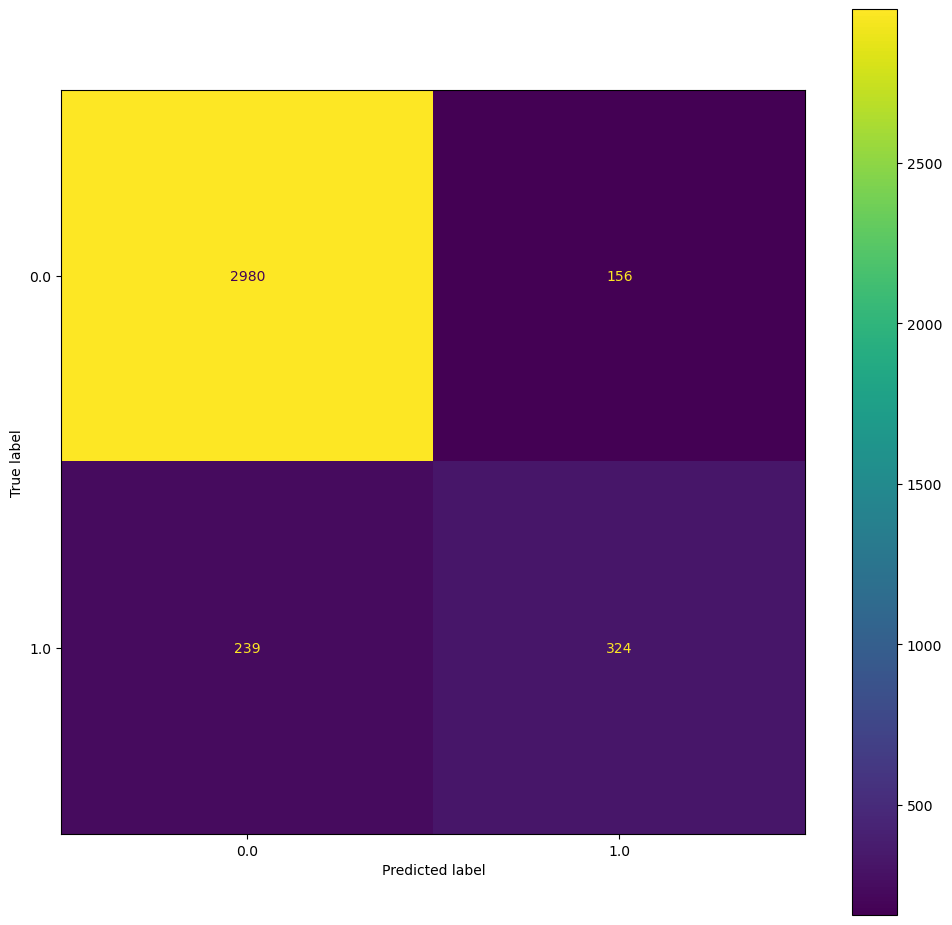

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import set_palette

conf_matrix_g2 = confusion_matrix(OSIy_test_g2, OSIy_pred_g2)
print(conf_matrix_g2)

plt.figure(figsize=(3,3),dpi=90)
set_palette("Paired")
ConfusionMatrixDisplay.from_estimator(ada_fit_g2, OSIX_test_g2, OSIy_test_g2)

Using the ConfusionMatrixDisplay module from scikit-learn, we can construct a confusion matrix by comparing the actual target values represented (OSIy_test_g2) with the predicted target values denoted (OSIy_pred_g2). Both the text as well as the actual visual are shown above.

The confusion matrix illustrate that the model excels at correctly identifying True Negatives, which means it effectively predicts cases where a purchase was not made when indeed no purchase was made. However, the model's performance in identifying True Positives, where it predicts a purchase when one was actually made, is not great. This relatively poor performance can be related to the presence of a number of False Negatives, where the model incorrectly predicts that a purchase was not made when it was actually made.   
This issue is likely a consequence of the dataset's imbalanced nature in terms of the target variable.

### Repeat the same with a different parameter set and compare the result (2)


**Using n_estimators of 1000 and a learning rate of 0.1**

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      3136
         1.0       0.67      0.57      0.62       563

    accuracy                           0.89      3699
   macro avg       0.80      0.76      0.78      3699
weighted avg       0.89      0.89      0.89      3699

0.761664801355711
[[2978  158]
 [ 240  323]]


<Figure size 270x270 with 0 Axes>

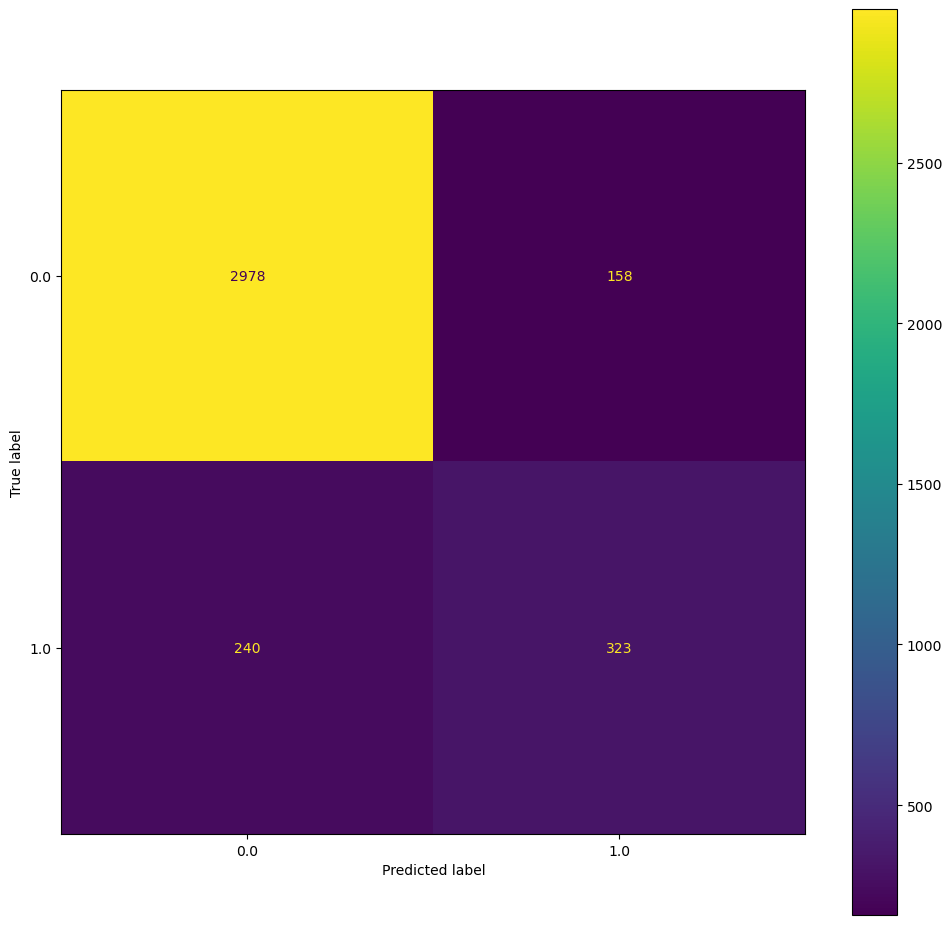

In [40]:
clf_g2 = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1, random_state=250)
ada_fit_g2 = clf_g2.fit(OSIX_train_g2, OSIy_train_g2)
OSIy_pred_g2 = ada_fit_g2.predict(OSIX_test_g2)

print(classification_report(OSIy_test_g2, OSIy_pred_g2))
print(roc_auc_score(OSIy_test_g2, OSIy_pred_g2))

conf_matrix_g2 = confusion_matrix(OSIy_test_g2, OSIy_pred_g2)
print(conf_matrix_g2)

plt.figure(figsize=(3,3),dpi=90)
set_palette("Paired")
ConfusionMatrixDisplay.from_estimator(ada_fit_g2, OSIX_test_g2, OSIy_test_g2)

Our group used a different n_estimator (`n_estimators=1000`) and a slower learning rate (`learning_rate=0.1`). 

The updated model incorporates ten times the number of base estimators while reducing the learning rate to one-tenth of the previous model's rate. As a result, this revised model exhibits the same accuracy of 89%, roughly the same AUC score, and a similar performance in predicting outcomes compared to the previous model.   
Overall, I would say that the performance of the model has not really changed substantially given the different parameters used. Similar to the initial model, this updated model continues to be affected by the dataset's inherent imbalance.

## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

Import GradientBoostingClassifier from scikit-learn.

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

### Create the appropriate classifier, describe what the syntax represents, and what parameters you chose. (1.5)

Create a variable `clf_g2` to instantiate the GradientBoostingClassifier model. `n_estimators` represents the number of base estimators (which are decision trees of depth of 1) and a `random_state` of 250 (picked randomly).

In [42]:
clf_g2 = GradientBoostingClassifier(n_estimators=100, random_state=250)

### Train classifier on train data and explain what you did. (1.5) 

Creating a new variable `gb_fit_g2` that represents the fitted GradientBoostingClassifier model. 

In [43]:
gb_fit_g2 = clf_g2.fit(OSIX_train_g2, OSIy_train_g2)

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Test/fit classifier test data and explain what you did. (1.5)

Store the predicted target values in variable `OSIy_pred_g2`.

In [44]:
OSIy_pred_g2 = gb_fit_g2.predict(OSIX_test_g2)

### Calculate accuracy and explain what you did. (1.5)

In [45]:
print(classification_report(OSIy_test_g2, OSIy_pred_g2))
print(roc_auc_score(OSIy_test_g2, OSIy_pred_g2))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      3136
         1.0       0.73      0.64      0.68       563

    accuracy                           0.91      3699
   macro avg       0.83      0.80      0.81      3699
weighted avg       0.91      0.91      0.91      3699

0.7992391117192881


We generated a classification report by contrasting the real target values contained in OSIy_test_g2 with the predicted values generated by the fitted model, referred to as OSIy_pred_g2.

The classification report reveals an accuracy rate of approximately 91% in effectively predicting whether an online shopper's session leads to a purchase. This represents a slight increase over the previous AdaBoost model. However, it's important to note that this level of accuracy should be considered in the context of the target variable's substantial imbalance, with the data split roughly 85% to 15% between Revenue=0 and Revenue=1.   
The impact of the imbalanced dataset is also evident in the precision, recall, and f1-scores, particularly when distinguishing between Revenue=0 and Revenue=1, where Revenue=0 exhibits markedly superior metrics.

Given the dataset's imbalance, it's worthwhile to examine the ROC AUC score for a more comprehensive assessment of the model's performance. The resulting score of 0.80 suggests that the model's capacity to differentiate between the target classes is reasonably effective. It looks like it is also slightly higher than the AUC score of the previous AdaBoost model.

### Show both text and visual confusion matrices using scikit-learn and matplotlib, explain what the graph tells you, and what you did. (2.5) 

[[3002  134]
 [ 202  361]]


<Figure size 270x270 with 0 Axes>

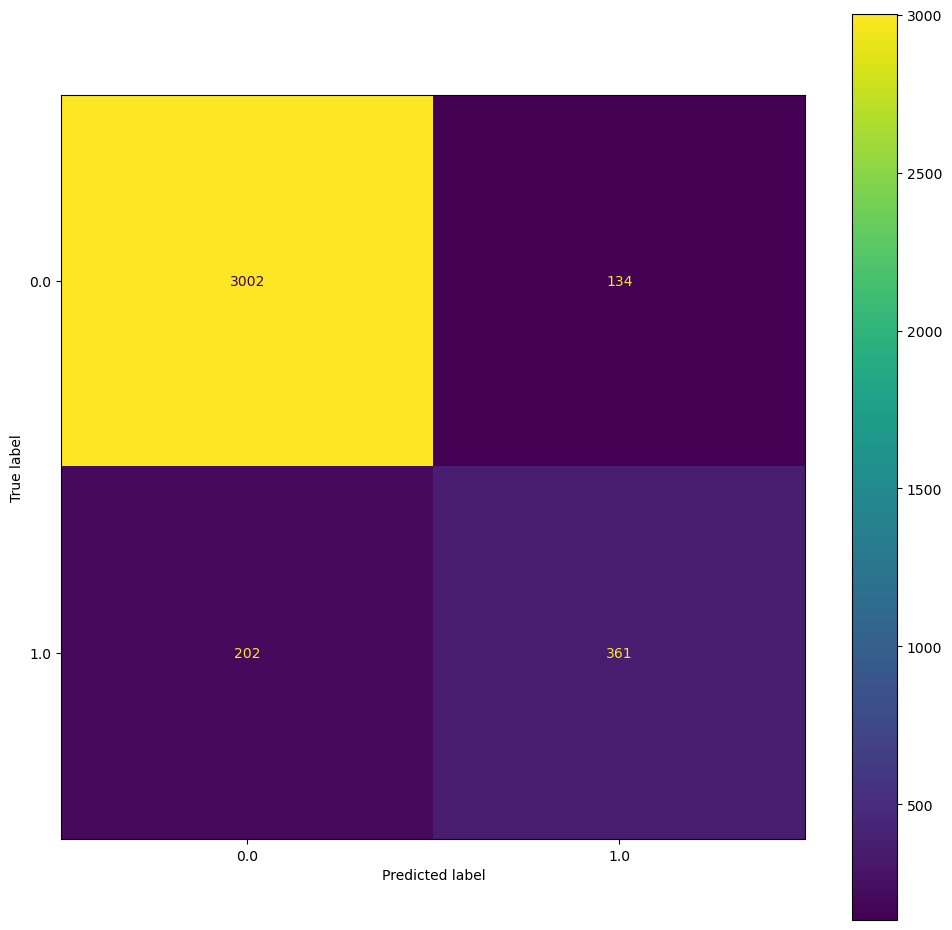

In [46]:
conf_matrix_g2 = confusion_matrix(OSIy_test_g2, OSIy_pred_g2)
print(conf_matrix_g2)

plt.figure(figsize=(3,3),dpi=90)
set_palette("Paired")
ConfusionMatrixDisplay.from_estimator(gb_fit_g2, OSIX_test_g2, OSIy_test_g2)

Using the ConfusionMatrixDisplay module from scikit-learn, we can construct a confusion matrix by comparing the actual target values represented (OSIy_test_g2) with the predicted target values denoted (OSIy_pred_g2). Both the text as well as the actual visual are shown above.

A similar story is being painted here. The confusion matrix illustrate that the model excels at correctly identifying True Negatives, which means it effectively predicts cases where a purchase was not made when indeed no purchase was made. However, the model's performance in identifying True Positives, where it predicts a purchase when one was actually made, is not great. This relatively poor performance can be related to the presence of a number of False Negatives, where the model incorrectly predicts that a purchase was not made when it was actually made.   
This issue is likely a consequence of the dataset's imbalanced nature in terms of the target variable.

### Repeat the same with a different parameter set and compare the result (2)


**Using n_estimars of 1000 and a learning rate of 1**

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      3136
         1.0       0.67      0.57      0.62       563

    accuracy                           0.89      3699
   macro avg       0.80      0.76      0.78      3699
weighted avg       0.89      0.89      0.89      3699

0.761664801355711
[[2978  158]
 [ 240  323]]


<Figure size 270x270 with 0 Axes>

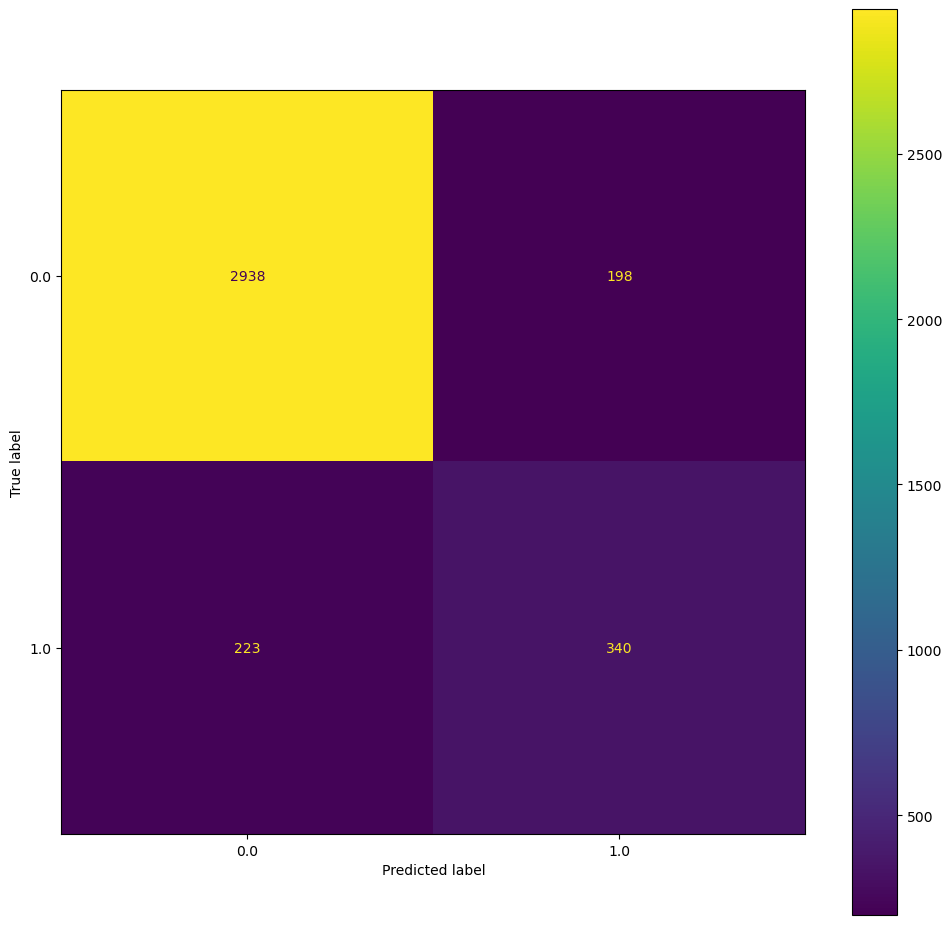

In [47]:
clf_g2 = GradientBoostingClassifier(n_estimators=1000, learning_rate=1, random_state=250)
gb_fit_g2 = clf_g2.fit(OSIX_train_g2, OSIy_train_g2)
OSIy_pred_g2 = ada_fit_g2.predict(OSIX_test_g2)

print(classification_report(OSIy_test_g2, OSIy_pred_g2))
print(roc_auc_score(OSIy_test_g2, OSIy_pred_g2))

conf_matrix_g2 = confusion_matrix(OSIy_test_g2, OSIy_pred_g2)
print(conf_matrix_g2)

plt.figure(figsize=(3,3),dpi=90)
set_palette("Paired")
ConfusionMatrixDisplay.from_estimator(gb_fit_g2, OSIX_test_g2, OSIy_test_g2)

Our group used a different n_estimator (`n_estimators=1000`) and a faster learning rate (`learning_rate=1`). 

The updated model employs ten times as many base estimators and learning rate as the previous model. This revised model exhibits a slight decrease in accuracy by 2%, a 4% decrease in ROC AUC score, and the confusion matrix indicates slightly less accurate predictions compared to the previous model. Nonetheless, it's essential to emphasize that this decline in performance is negligible and minimal. Similar to the initial model, the dataset's inherent imbalance continues to affect the performance of this updated model.

## XG Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

Import xgboost and XGBClassifier.

In [48]:
import xgboost as xgb
from xgboost import XGBClassifier

### Create the appropriate classifier, describe what the syntax represents, and what parameters you chose. (1.5)

Create a variable `clf_g2` to instantiate the XGBClassifier model. `n_estimators` represents the number of base estimators (trees) and a `random_state` of 250 (picked randomly).

In [49]:
clf_g2 = XGBClassifier(n_estimators=100, random_state=250)

### Train classifier on train data and explain what you did. (1.5) 

Creating a new variable `xgb_fit_g2` that represents the fitted XGBClassifier model. 

In [50]:
xgb_fit_g2 = clf_g2.fit(OSIX_train_g2, OSIy_train_g2)

### Test/fit classifier test data and explain what you did. (1.5)

Store the predicted target values in variable `OSIy_pred_g2`.

In [51]:
OSIy_pred_g2 = xgb_fit_g2.predict(OSIX_test_g2)

### Calculate accuracy and explain what you did. (1.5)

In [52]:
print(classification_report(OSIy_test_g2, OSIy_pred_g2))
print(roc_auc_score(OSIy_test_g2, OSIy_pred_g2))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      3136
         1.0       0.72      0.59      0.65       563

    accuracy                           0.90      3699
   macro avg       0.82      0.77      0.80      3699
weighted avg       0.90      0.90      0.90      3699

0.7739625434987494


Similarly to the previous models, we generated a classification report by contrasting the real target values contained in OSIy_test_g2 with the predicted values generated by the fitted model, referred to as OSIy_pred_g2.

Again, the classification report reveals an accuracy rate of approximately 90% in effectively predicting whether an online shopper's session leads to a purchase. This represents a slight increase over the previous AdaBoost model. However, it's important to note that this level of accuracy should be considered in the context of the target variable's substantial imbalance, with the data split roughly 85% to 15% between Revenue=0 and Revenue=1.   
The impact of the imbalanced dataset is also evident in the precision, recall, and f1-scores, particularly when distinguishing between Revenue=0 and Revenue=1, where Revenue=0 exhibits markedly superior metrics.

Given the dataset's imbalance, it's worthwhile to examine the ROC AUC score for a more comprehensive assessment of the model's performance. The resulting score of 0.77 suggests that the model's capacity to differentiate between the target classes is reasonably effective. It looks like it is also slightly higher than the AUC score of the previous AdaBoost model.

### Show both text and visual confusion matrices using scikit-learn and matplotlib, explain what the graph tells you, and what you did. (2.5) 


[[3005  131]
 [ 231  332]]


<Figure size 270x270 with 0 Axes>

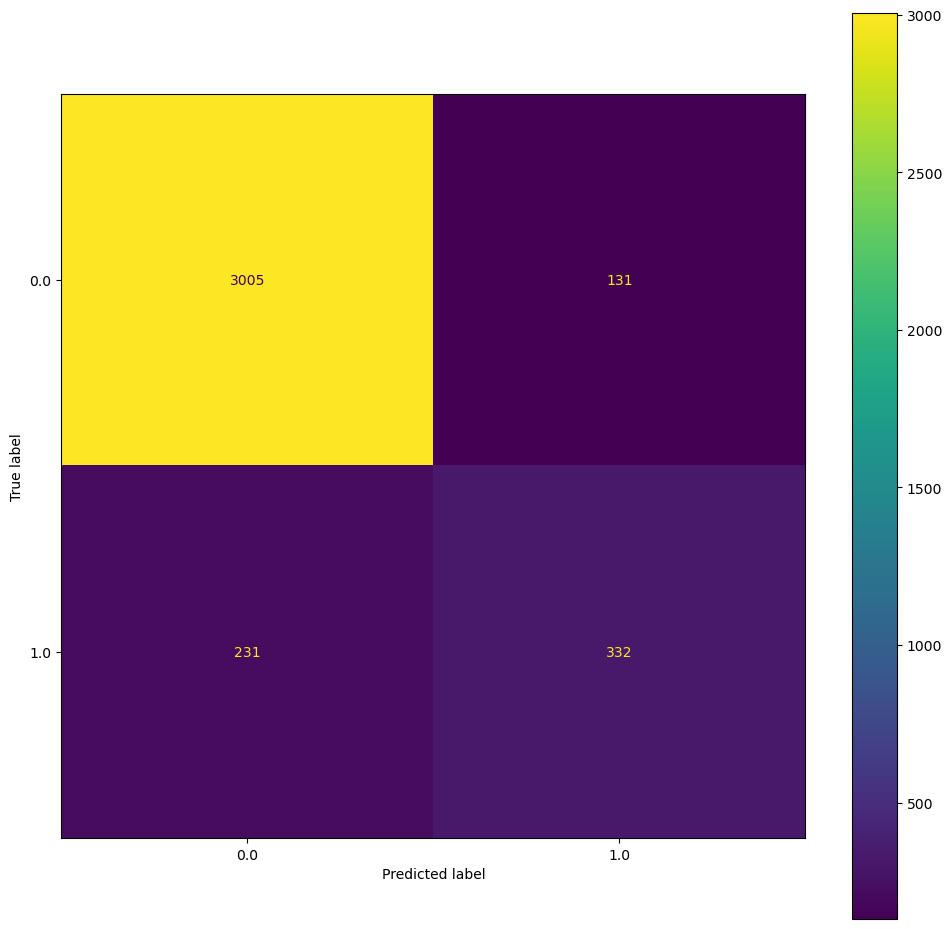

In [53]:
conf_matrix_g2 = confusion_matrix(OSIy_test_g2, OSIy_pred_g2)
print(conf_matrix_g2)

plt.figure(figsize=(3,3),dpi=90)
set_palette("Paired")
ConfusionMatrixDisplay.from_estimator(xgb_fit_g2, OSIX_test_g2, OSIy_test_g2)

Using the ConfusionMatrixDisplay module from scikit-learn, we can construct a confusion matrix by comparing the actual target values represented (OSIy_test_g2) with the predicted target values denoted (OSIy_pred_g2). Both the text as well as the actual visual are shown above.

A similar story is being painted here. The confusion matrix illustrate that the model excels at correctly identifying True Negatives, which means it effectively predicts cases where a purchase was not made when indeed no purchase was made. However, the model's performance in identifying True Positives, where it predicts a purchase when one was actually made, is not great. This relatively poor performance can be related to the presence of a number of False Negatives, where the model incorrectly predicts that a purchase was not made when it was actually made.   
This issue is likely a consequence of the dataset's imbalanced nature in terms of the target variable.

### Repeat the same with a different parameter set and compare the result (2)


**Using a slower learning rate of 0.03**

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      3136
         1.0       0.74      0.62      0.67       563

    accuracy                           0.91      3699
   macro avg       0.83      0.79      0.81      3699
weighted avg       0.90      0.91      0.91      3699

0.7907455277848262
[[3010  126]
 [ 213  350]]


<Figure size 270x270 with 0 Axes>

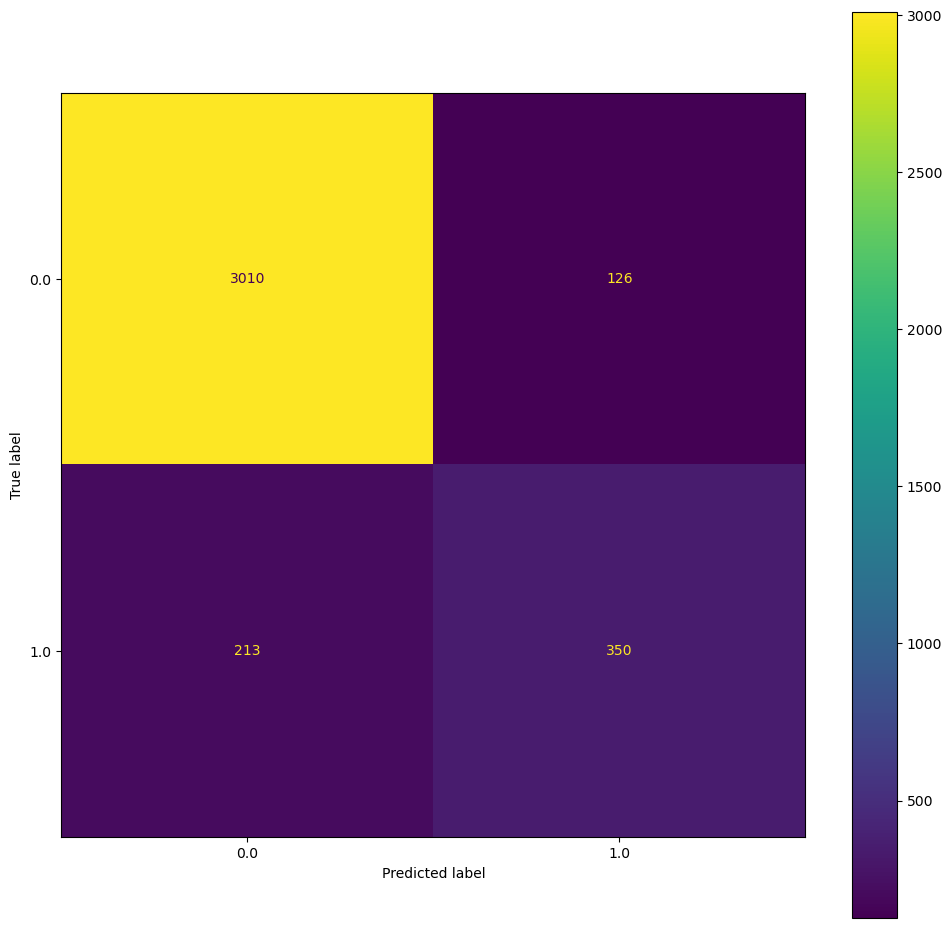

In [54]:
clf_g2 = XGBClassifier(n_estimators=100, learning_rate=0.03, random_state=250)
xgb_fit_g2 = clf_g2.fit(OSIX_train_g2, OSIy_train_g2)
OSIy_pred_g2 = xgb_fit_g2.predict(OSIX_test_g2)

print(classification_report(OSIy_test_g2, OSIy_pred_g2))
print(roc_auc_score(OSIy_test_g2, OSIy_pred_g2))

conf_matrix_g2 = confusion_matrix(OSIy_test_g2, OSIy_pred_g2)
print(conf_matrix_g2)

plt.figure(figsize=(3,3),dpi=90)
set_palette("Paired")
ConfusionMatrixDisplay.from_estimator(xgb_fit_g2, OSIX_test_g2, OSIy_test_g2)

The updated model employs a much slower learning rate as the previous model (about on-tenth). This revised model exhibits a slight increase in accuracy by 1%, a 2% increase in ROC AUC score, and the confusion matrix indicates slightly better accurate predictions compared to the previous model. Nonetheless, it's essential to emphasize that this increase in performance is negligible and minimal. Similar to the initial model, the dataset's inherent imbalance continues to affect the performance of this updated model.

## Bagging
### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

Import BaggingClassifier from scikit-learn.

In [55]:
from sklearn.ensemble import BaggingClassifier

### Create the appropriate classifier, describe what the syntax represents, and what parameters you chose. (1.5)

Create a variable `clf_g2` to instantiate the BaggingClassifier model. `n_estimators` represents the number of base estimators (trees) and a `random_state` of 250 (picked randomly).

In [56]:
clf_g2 = BaggingClassifier(n_estimators=10, random_state=250)

### Train classifier on train data and explain what you did. (1.5) 

Creating a new variable `bag_fit_g2` that represents the fitted BaggingClassifier model. 

In [57]:
bag_fit_g2 = clf_g2.fit(OSIX_train_g2, OSIy_train_g2)

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Test/fit classifier test data and explain what you did. (1.5)

Store the predicted target values in variable `OSIy_pred_g2`.

In [58]:
OSIy_pred_g2 = bag_fit_g2.predict(OSIX_test_g2)

### Calculate accuracy and explain what you did. (1.5)

In [59]:
print(classification_report(OSIy_test_g2, OSIy_pred_g2))
print(roc_auc_score(OSIy_test_g2, OSIy_pred_g2))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      3136
         1.0       0.72      0.56      0.63       563

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.79      3699
weighted avg       0.89      0.90      0.89      3699

0.7624857836118462


Similarly to the previous models, we generated a classification report by contrasting the real target values contained in OSIy_test_g2 with the predicted values generated by the fitted model, referred to as OSIy_pred_g2.

Again, the classification report reveals an accuracy rate of approximately 90% in effectively predicting whether an online shopper's session leads to a purchase. This represents a slight increase over the previous AdaBoost model. However, it's important to note that this level of accuracy should be considered in the context of the target variable's substantial imbalance, with the data split roughly 85% to 15% between Revenue=0 and Revenue=1.   
The impact of the imbalanced dataset is also evident in the precision, recall, and f1-scores, particularly when distinguishing between Revenue=0 and Revenue=1, where Revenue=0 exhibits markedly superior metrics.

Given the dataset's imbalance, it's worthwhile to examine the ROC AUC score for a more comprehensive assessment of the model's performance. The resulting score of 0.76 suggests that the model's capacity to differentiate between the target classes is reasonably effective. It looks like it is about the same as the AUC score of the previous AdaBoost model.

### Show both text and visual confusion matrices using scikit-learn and matplotlib, explain what the graph tells you, and what you did. (2.5) 


[[3011  125]
 [ 245  318]]


<Figure size 270x270 with 0 Axes>

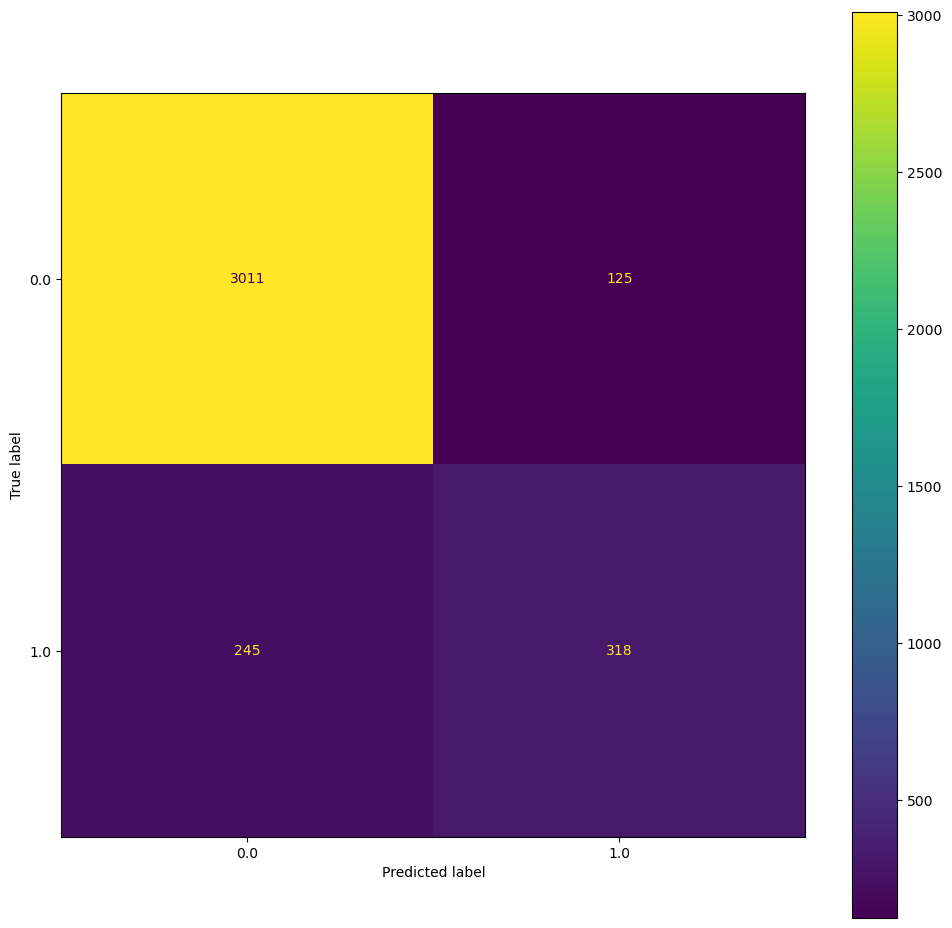

In [60]:
conf_matrix_g2 = confusion_matrix(OSIy_test_g2, OSIy_pred_g2)
print(conf_matrix_g2)

plt.figure(figsize=(3,3),dpi=90)
set_palette("Paired")
ConfusionMatrixDisplay.from_estimator(bag_fit_g2, OSIX_test_g2, OSIy_test_g2)

Using the ConfusionMatrixDisplay module from scikit-learn, we can construct a confusion matrix by comparing the actual target values represented (OSIy_test_g2) with the predicted target values denoted (OSIy_pred_g2). Both the text as well as the actual visual are shown above.

A similar story is being painted here. The confusion matrix illustrate that the model excels at correctly identifying True Negatives, which means it effectively predicts cases where a purchase was not made when indeed no purchase was made. However, the model's performance in identifying True Positives, where it predicts a purchase when one was actually made, is not great. This relatively poor performance can be related to the presence of a number of False Negatives, where the model incorrectly predicts that a purchase was not made when it was actually made.   
This issue is likely a consequence of the dataset's imbalanced nature in terms of the target variable.

### Repeat the same with a different parameter set and compare the result (2)


**Increasing number of base estimators (trees) to 100**

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      3136
         1.0       0.72      0.62      0.67       563

    accuracy                           0.91      3699
   macro avg       0.83      0.79      0.81      3699
weighted avg       0.90      0.91      0.90      3699

0.7876938186464639
[[3002  134]
 [ 215  348]]


<Figure size 270x270 with 0 Axes>

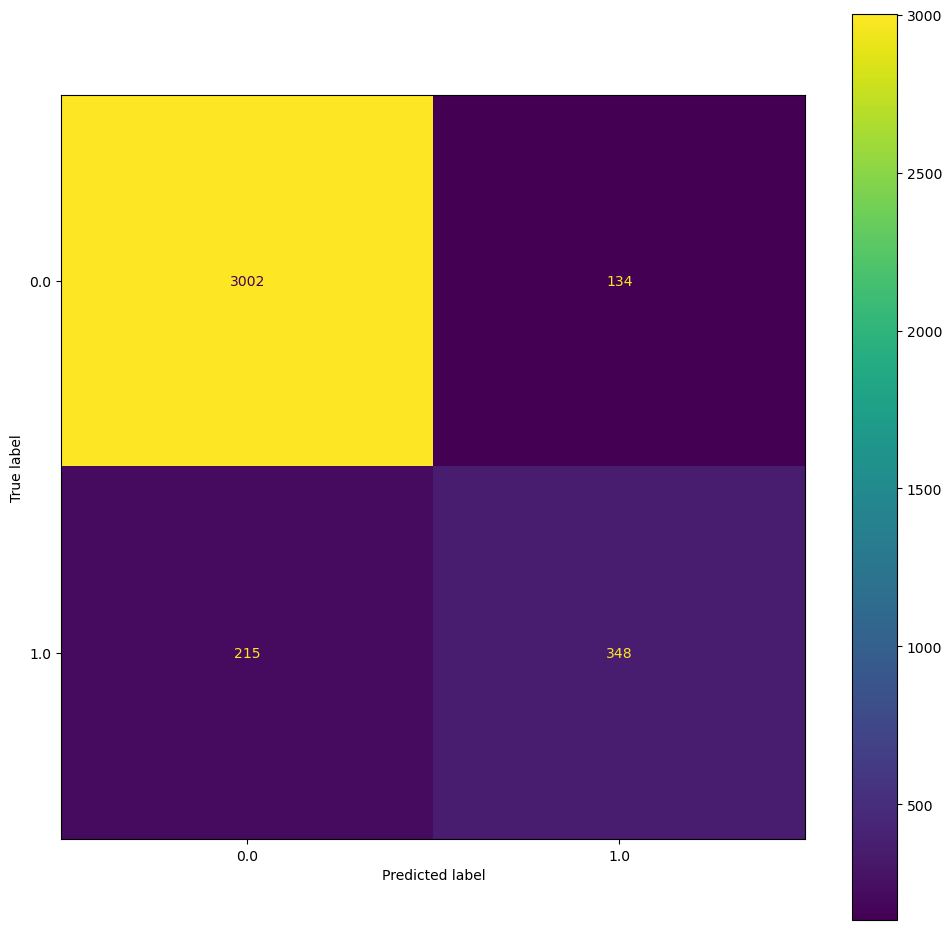

In [61]:
clf_g2 = BaggingClassifier(n_estimators=100, n_jobs=-1, random_state=250)
bag_fit_g2 = clf_g2.fit(OSIX_train_g2, OSIy_train_g2)
OSIy_pred_g2 = bag_fit_g2.predict(OSIX_test_g2)

print(classification_report(OSIy_test_g2, OSIy_pred_g2))
print(roc_auc_score(OSIy_test_g2, OSIy_pred_g2))

conf_matrix_g2 = confusion_matrix(OSIy_test_g2, OSIy_pred_g2)
print(conf_matrix_g2)

plt.figure(figsize=(3,3),dpi=90)
set_palette("Paired")
ConfusionMatrixDisplay.from_estimator(bag_fit_g2, OSIX_test_g2, OSIy_test_g2)

The updated model employs ten times as many base estimators as the previous one. This revised model exhibits a slight increase in accuracy by 1%, a 3% increase in ROC AUC score, and the confusion matrix indicates slightly better accurate predictions compared to the previous model. Nonetheless, it's essential to emphasize that this increase in performance is negligible and minimal. Similar to the initial model, the dataset's inherent imbalance continues to affect the performance of this updated model.

# Regression (22 Points)
## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

Import GradientBoostingRegressor from scikit-learn.

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

### Create the appropriate regressor, describe what the syntax represents, and what parameters you chose. (1.5)

Create a variable `reg_g2` to instantiate the GradientBoostingRegressor model. `n_estimators` represents the number of base estimators (trees) and a `random_state` of 250 (picked randomly).

In [63]:
reg_g2 = GradientBoostingRegressor(n_estimators=100, random_state=250)

### Train regressor on train data and explain what you did. (1.5) 

Creating a new variable `gb_fit_g2` that represents the fitted GradientBoostingRegressor model. 

In [64]:
gb_fit_g2 = reg_g2.fit(BSHX_train_g2, BSHy_train_g2)

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Test/fit regressor test data and explain what you did. (1.5)

Store the predicted target values in variable `BSHy_pred_g2`.

In [65]:
BSHy_pred_g2 = gb_fit_g2.predict(BSHX_test_g2)

### Calculate model evaluation metrics and explain what you did. (1.5)

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#We decided to calculate the MSE, MAE, RMSE and R2 to evaluate
mse = mean_squared_error(BSHy_test_g2, BSHy_pred_g2)
mae = mean_absolute_error(BSHy_test_g2, BSHy_pred_g2)
r2 = r2_score(BSHy_test_g2, BSHy_pred_g2)
rmse = np.sqrt(mse)

#Printing Results
print(f"Mean Absolute Error (mae_g2): {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")
print(f"Root Mean Squared Error (rmse_g2): {rmse:.2f}")


Mean Absolute Error (mae_g2): 3.58
R-squared (R^2): 1.00
Root Mean Squared Error (rmse_g2): 5.80


We used the mean squared error function, the mean absolute error function and the r2 score function from ScikitLearn to calculate our error metrics and printing the results. 

First of all, an R^2 value of 1 signifies a flawless fit between the model and the data, meaning that the model captures 100% of the variance in the data.
As for the error metrics MAE And RMSE, they demonstrate the model's solid performance. Indeed, a low Mean Squared error as well as RMSE indicates that, on average, the model's predictions deviate only slightly, within a couple units, from the actual rental count. 

### Plot the true vs predicted Y values using matplotlib, explain what the graph tells you, and what you did. (2.5) 


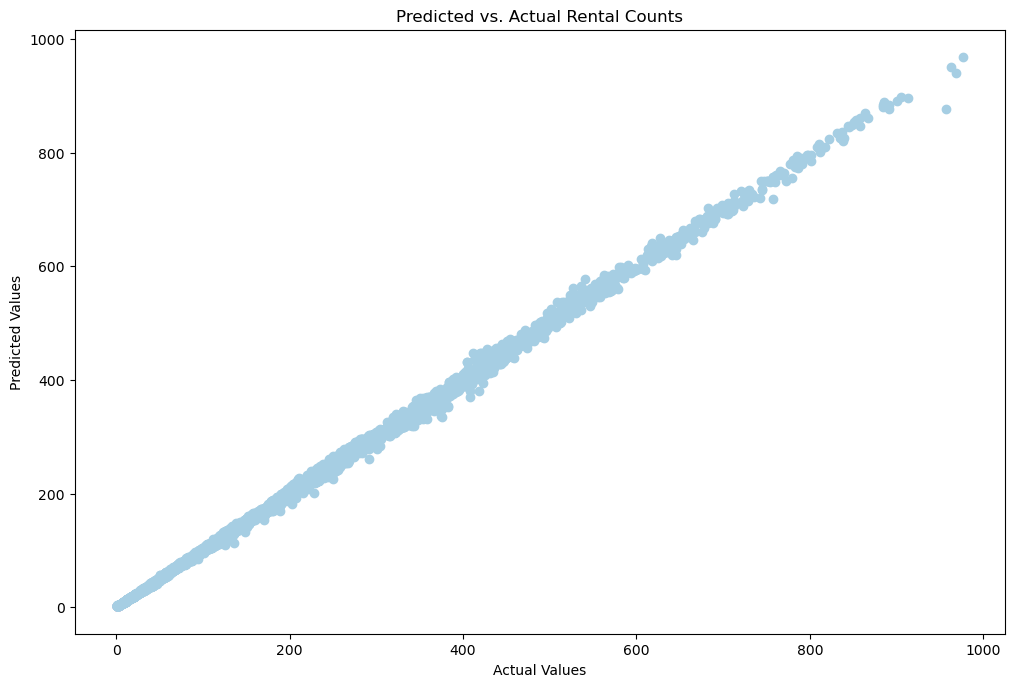

In [67]:
plt.figure(figsize=(12, 8))
plt.scatter(BSHy_test_g2, BSHy_pred_g2, alpha=1)
plt.title("Predicted vs. Actual Rental Counts")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

The scatter plot depicted above exhibits a remarkably close alignment between Actual and Predicted rental counts. This suggests a low bias as this alignment implies that the model's predictions closely resemble the actual values. Furthermore, there appears to be symmetry across the model's errors as well as an even distribution across, which may be due to the absence or low amount of outliers.

### Repeat the same with a different parameter set and compare the result (2)


**Decreasing learning rate to 0.01**

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error (mae_g2): 55.32
R-squared (R^2): 0.84
Root Mean Squared Error (rmse_g2): 72.74


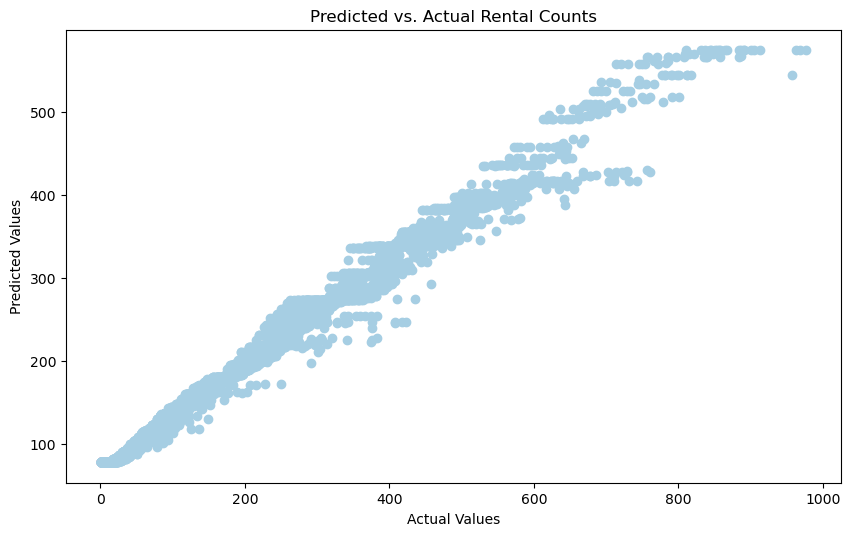

In [68]:
reg_g2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, random_state=250)
gb_fit_g2 = reg_g2.fit(BSHX_train_g2, BSHy_train_g2)
BSHy_pred_g2 = gb_fit_g2.predict(BSHX_test_g2)

mae = mean_absolute_error(BSHy_test_g2, BSHy_pred_g2)
mse = mean_squared_error(BSHy_test_g2, BSHy_pred_g2)
rmse = np.sqrt(mse)
r2 = r2_score(BSHy_test_g2, BSHy_pred_g2)

print(f"Mean Absolute Error (mae_g2): {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")
print(f"Root Mean Squared Error (rmse_g2): {rmse:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(BSHy_test_g2, BSHy_pred_g2, alpha=1)
plt.title("Predicted vs. Actual Rental Counts")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

The updated model utilizes a much slower learning rate. This adjustment resulted in a significant decline in the new model's performance compared to the previous one. However, we could also think that this new model would be able to generalize better and that the first model was overfitted. Therefore, this new model, while performing worse than the first model on our training/test data, might be able to perform better on new unseen data.

## XG Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

Import XGBRegressor.

In [69]:
from xgboost import XGBRegressor

### Create the appropriate regressor, describe what the syntax represents, and what parameters you chose. (1.5)

Create a variable `reg_g2` to instantiate the XGBRegressor model. `n_estimators` represents the number of base estimators (trees) and a `random_state` of 250 (picked randomly).

In [70]:
reg_g2 = XGBRegressor(n_estimators=100, random_state=250)

### Train regressor on train data and explain what you did. (1.5) 

Creating a new variable `xgb_fit_g2` that represents the fitted XGBRegressor model.

In [71]:
xgb_fit_g2 = reg_g2.fit(BSHX_train_g2, BSHy_train_g2)

### Test/fit regressor test data and explain what you did. (1.5)

Store the predicted target values in variable `BSHy_pred_g2`.

In [72]:
BSHy_pred_g2 = xgb_fit_g2.predict(BSHX_test_g2)

### Calculate model evaluation metrics and explain what you did. (1.5)

In [73]:
#We decided to calculate the MSE, MAE, RMSE and R2 to evaluate
mse = mean_squared_error(BSHy_test_g2, BSHy_pred_g2)
mae = mean_absolute_error(BSHy_test_g2, BSHy_pred_g2)
r2 = r2_score(BSHy_test_g2, BSHy_pred_g2)
rmse = np.sqrt(mse)

#Printing Results
print(f"Mean Absolute Error (mae_g2): {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")
print(f"Root Mean Squared Error (rmse_g2): {rmse:.2f}")

Mean Absolute Error (mae_g2): 2.01
R-squared (R^2): 1.00
Root Mean Squared Error (rmse_g2): 3.75


We used the mean squared error function, the mean absolute error function and the r2 score function from ScikitLearn to calculate our error metrics and printing the results. 

First of all, an R^2 value of 1 signifies a flawless fit between the model and the data, meaning that the model captures 100% of the variance in the data.
As for the error metrics MAE And RMSE, they demonstrate the model's solid performance. Indeed, a low Mean Squared error as well as RMSE indicates that, on average, the model's predictions deviate only slightly, within a few units, from the actual rental count.

### Plot the true vs predicted Y values using matplotlib, explain what the graph tells you, and what you did. (2.5) 


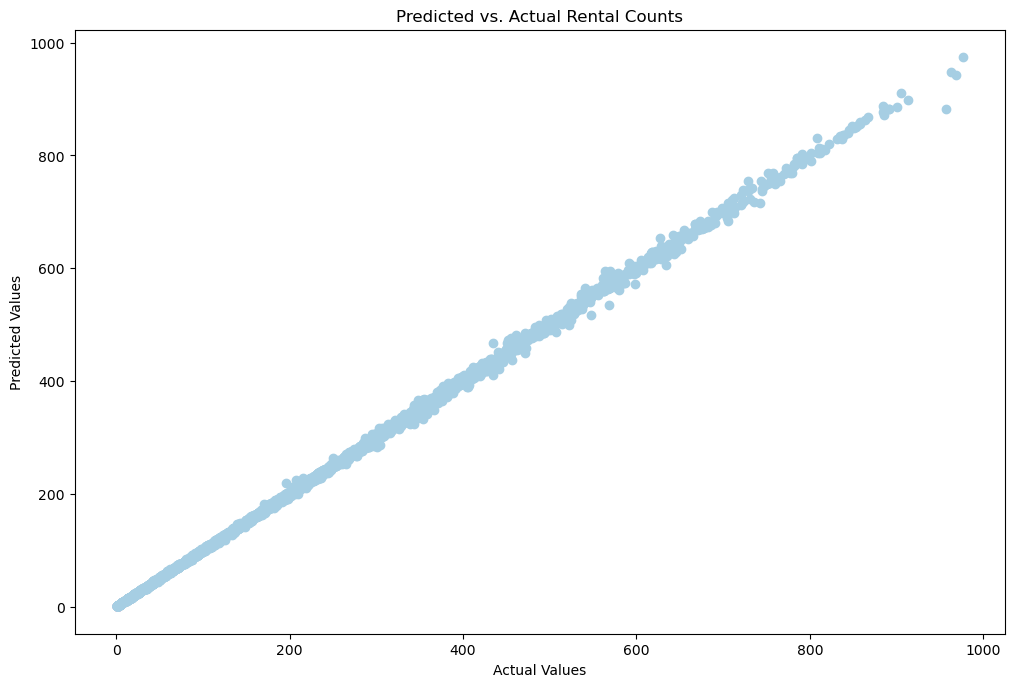

In [74]:
plt.figure(figsize=(12, 8))
plt.scatter(BSHy_test_g2, BSHy_pred_g2, alpha=1)
plt.title("Predicted vs. Actual Rental Counts")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

The scatter plot depicted above exhibits a remarkably close alignment between Actual and Predicted rental counts. This suggests a low bias as this alignment implies that the model's predictions closely resemble the actual values. Furthermore, there appears to be symmetry across the model's errors as well as an even distribution across, which may be due to the absence or low amount of outliers.

### Repeat the same with a different parameter set and compare the result (2)


**Decreasing learning rate to 0.03**

Mean Absolute Error (mae_g2): 9.33
R-squared (R^2): 0.99
Root Mean Squared Error (rmse_g2): 14.05


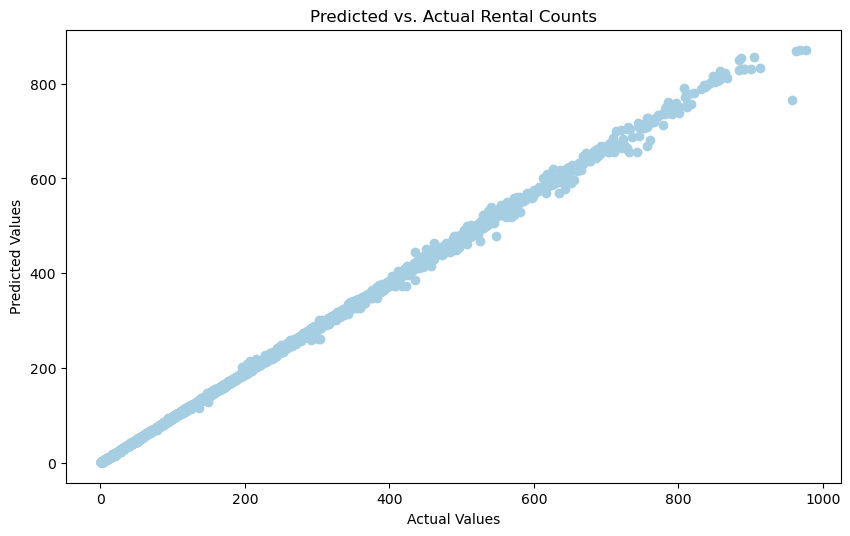

In [75]:
reg_g2 = XGBRegressor(n_estimators=100, learning_rate=0.03, random_state=250)
xgb_fit_g2 = reg_g2.fit(BSHX_train_g2, BSHy_train_g2)
BSHy_pred_g2 = xgb_fit_g2.predict(BSHX_test_g2)

mae = mean_absolute_error(BSHy_test_g2, BSHy_pred_g2)
mse = mean_squared_error(BSHy_test_g2, BSHy_pred_g2)
rmse = np.sqrt(mse)
r2 = r2_score(BSHy_test_g2, BSHy_pred_g2)

print(f"Mean Absolute Error (mae_g2): {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")
print(f"Root Mean Squared Error (rmse_g2): {rmse:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(BSHy_test_g2, BSHy_pred_g2, alpha=1)
plt.title("Predicted vs. Actual Rental Counts")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Similar story here. The updated model utilizes a much slower learning rate. This adjustment resulted in a significant decline in the new model's performance compared to the previous one. However, we could also think that this new model would be able to generalize better and that the first model was overfitted. Therefore, this new model, while performing worse than the first model on our training/test data, might be able to perform better on new unseen data.

## Bagging

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

Import BaggingRegressor from scikit-learn.

In [76]:
from sklearn.ensemble import BaggingRegressor

### Create the appropriate regressor, describe what the syntax represents, and what parameters you chose. (1.5)

Create a variable `reg_g2` to instantiate the BaggingRegressor model. `n_estimators` represents the number of base estimators (trees) and a `random_state` of 250 (picked randomly).

In [77]:
reg_g2 = BaggingRegressor(n_estimators=10, random_state=250)

### Train regressor on train data and explain what you did. (1.5) 

Creating a new variable `bag_fit_g2` that represents the fitted BaggingRegressor model.

In [78]:
bag_fit_g2 = reg_g2.fit(BSHX_train_g2, BSHy_train_g2)

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


### Test/fit regressor test data and explain what you did. (1.5)

Store the predicted target values in variable `BSHy_pred_g2`.

In [79]:
BSHy_pred_g2 = bag_fit_g2.predict(BSHX_test_g2)

### Calculate model evaluation metrics and explain what you did. (1.5)

In [80]:
#We decided to calculate the MSE, MAE, RMSE and R2 to evaluate
mse = mean_squared_error(BSHy_test_g2, BSHy_pred_g2)
mae = mean_absolute_error(BSHy_test_g2, BSHy_pred_g2)
r2 = r2_score(BSHy_test_g2, BSHy_pred_g2)
rmse = np.sqrt(mse)

#Printing Results
print(f"Mean Absolute Error (mae_g2): {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")
print(f"Root Mean Squared Error (rmse_g2): {rmse:.2f}")

Mean Absolute Error (mae_g2): 1.44
R-squared (R^2): 1.00
Root Mean Squared Error (rmse_g2): 3.80


We used the mean squared error function, the mean absolute error function and the r2 score function from ScikitLearn to calculate our error metrics and printing the results. 

First of all, an R^2 value of 1 signifies a flawless fit between the model and the data, meaning that the model captures 100% of the variance in the data.
As for the error metrics MAE And RMSE, they demonstrate the model's solid performance. Indeed, a low Mean Squared error as well as RMSE indicates that, on average, the model's predictions deviate only slightly, within a few units, from the actual rental count.

### Plot the true vs predicted Y values using matplotlib, explain what the graph tells you, and what you did. (2.5) 


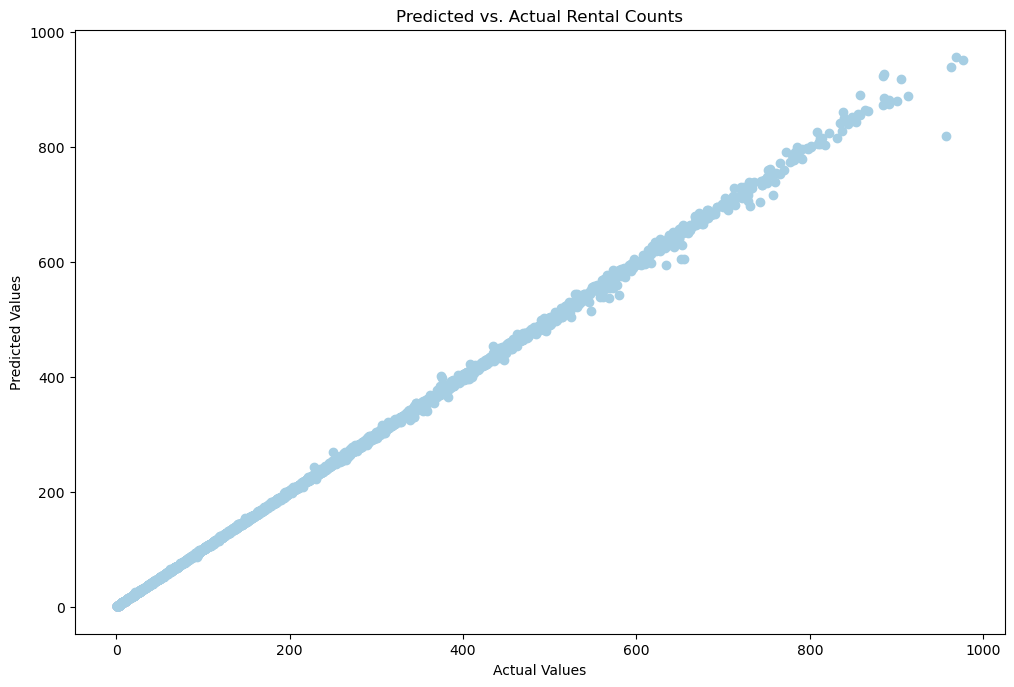

In [81]:
plt.figure(figsize=(12, 8))
plt.scatter(BSHy_test_g2, BSHy_pred_g2, alpha=1)
plt.title("Predicted vs. Actual Rental Counts")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

The scatter plot depicted above exhibits a remarkably close alignment between Actual and Predicted rental counts. This suggests a low bias as this alignment implies that the model's predictions closely resemble the actual values. Furthermore, there appears to be symmetry across the model's errors as well as an even distribution across, which may be due to the absence or low amount of outliers.

### Repeat the same with a different parameter set and compare the result (2)


**Increase base number of estimators to 100**

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Mean Absolute Error (mae_g2): 1.07
R-squared (R^2): 1.00
Root Mean Squared Error (rmse_g2): 3.16


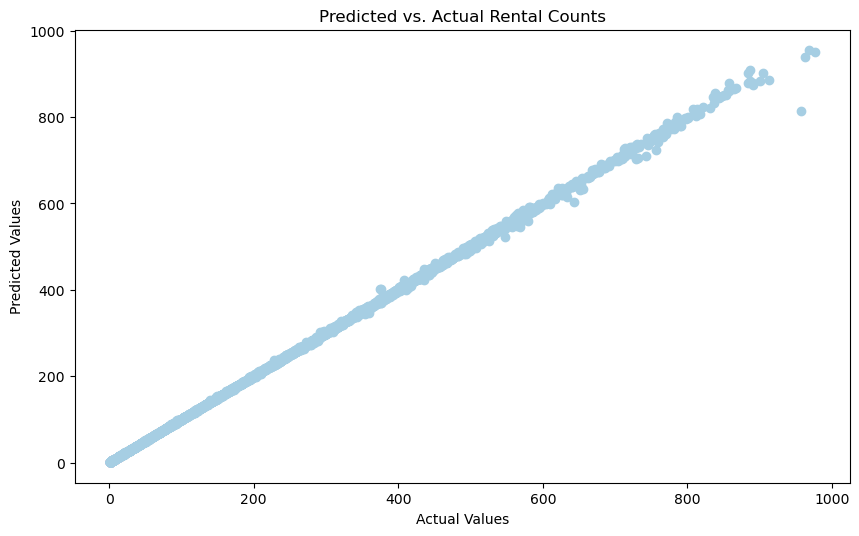

In [82]:
reg_g2 = BaggingRegressor(n_estimators=100, n_jobs=-1, random_state=250)
bag_fit_g2 = reg_g2.fit(BSHX_train_g2, BSHy_train_g2)
BSHy_pred_g2 = bag_fit_g2.predict(BSHX_test_g2)

mae = mean_absolute_error(BSHy_test_g2, BSHy_pred_g2)
mse = mean_squared_error(BSHy_test_g2, BSHy_pred_g2)
rmse = np.sqrt(mse)
r2 = r2_score(BSHy_test_g2, BSHy_pred_g2)

print(f"Mean Absolute Error (mae_g2): {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")
print(f"Root Mean Squared Error (rmse_g2): {rmse:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(BSHy_test_g2, BSHy_pred_g2, alpha=1)
plt.title("Predicted vs. Actual Rental Counts")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

The updated model utilizes a more base estimators (trees). This adjustment resulted in a slight improvement in the new model's performance compared to the previous one. However, we could also think that this new model might be overfitted and would not be able to generalize better. Therefore, this new model, while performing better than the first model on our training/test data, might be able to perform worse on new unseen data.

# Bonus Question (5)
For all the given classifiers (Q3), evaluate the different parameter sets including (njobs, learning rate, etc).

## For boosting and bagging compare the trade off between n jobs and learning rate. Plot the graph of different learning rates vs number of jobs (Label the plot correctly. It should show title, x and y tick labels, and x and y axis labels). (1)

**First, we will tackle the trade off between `learning_rate` and `n_estimators` in a XGB Classifer**

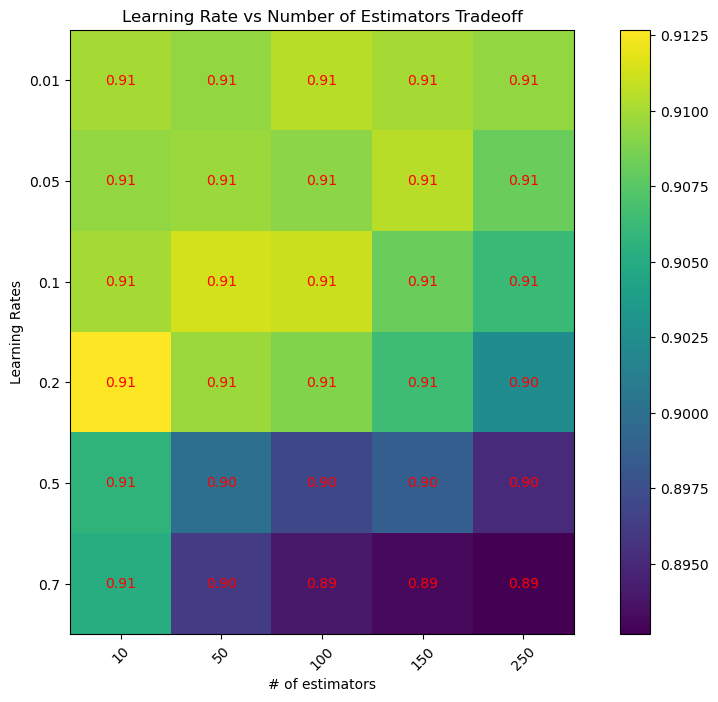

In [83]:
# Creating 2 lists of learning rates and number of estimators
l_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 0.7] 
n = [10, 50, 100, 150, 250]

# Next, we create an output array to store our output in
output = np.zeros((len(l_rates), len(n)))

# loop over the lists of learning rates and number of estimators
for i, lr in enumerate(l_rates):
    for j, trees in enumerate(n):
        #Using the XGB Classifer
        clf_g2 = XGBClassifier(learning_rate=lr, n_estimators=trees, random_state=250)
        xgb_fit_g2 = clf_g2.fit(OSIX_train_g2, OSIy_train_g2)
        OSIy_pred_g2 = xgb_fit_g2.predict(OSIX_test_g2)
        
        acc = accuracy_score(OSIy_test_g2, OSIy_pred_g2)
        output[i, j] = acc

# our group decided to use a heatmap to show the results
plt.figure(figsize=(12, 8))
plt.imshow(output, interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(len(n)), n, rotation=45)
plt.yticks(np.arange(len(l_rates)), l_rates)
plt.xlabel('# of estimators')
plt.ylabel('Learning Rates')
plt.title('Learning Rate vs Number of Estimators Tradeoff')

# We also decided to add accuracy details on the plot for clarity
for i in range(len(l_rates)):
    for j in range(len(n)):
        plt.annotate(f'{output[i, j]:.2f}', (j, i), color='r', # round to 2 digits
                     ha='center', va='center', fontsize=10)
        
plt.show();

**Next, we analyze the trade off between `n_jobs` and `n_estimators` in a Bagging Regressor model**

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

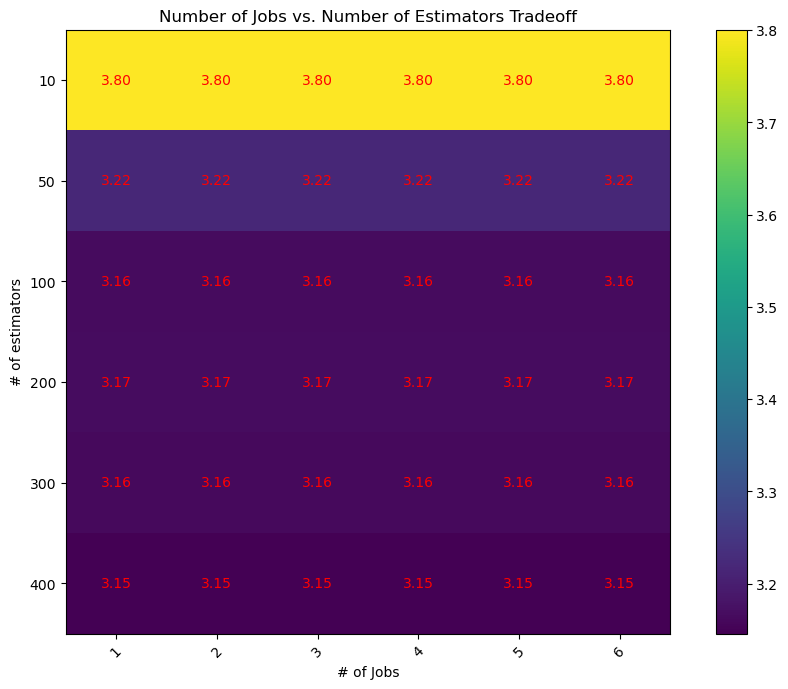

In [84]:
# Creating 2 lists of jobs (cores) and number of estimators
jobs = [1, 2, 3, 4, 5, 6] 
n = [10, 50, 100, 200, 300, 400]

# Next, we create an output array to store our output in
output = np.zeros((len(jobs), len(n)))

# iterate over every combination of learning_rates and n_estimators
for i, job in enumerate(jobs):
    for j, trees in enumerate(n):
        reg_g2 = BaggingRegressor(n_estimators=trees, n_jobs=job, random_state=250)
        bag_fit_g2 = reg_g2.fit(BSHX_train_g2, BSHy_train_g2)
        BSHy_pred_g2 = bag_fit_g2.predict(BSHX_test_g2)
        
        rmse = np.sqrt(mean_squared_error(BSHy_test_g2, BSHy_pred_g2))
        output[i, j] = rmse

# our group decided to use a heatmap to show the results
plt.figure(figsize=(12, 8))
plt.imshow(output.T, interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(len(jobs)), jobs, rotation=45)
plt.yticks(np.arange(len(n)), n)
plt.xlabel('# of Jobs')
plt.ylabel('# of estimators')
plt.title('Number of Jobs vs. Number of Estimators Tradeoff')

# We also decided to add RMSE details on the plot for clarity
for i in range(len(jobs)):
    for j in range(len(n)):
        plt.annotate(f'{output[i, j]:.2f}', (i, j), color='r', # round to 2 digits
                     ha='center', va='center', fontsize=10)

plt.show();

## Explain the graph in detail. Specifically, describe the trade off between the learning rate and n jobs. Also, comment on the evolution of error for each combination (1 paragraph at least, 1.5).

The heatmap representing the trade-off in learning rate vs number of estimators reveals that there is a very slight trade-off in accuracy. There's been very little variation in accuracy. All accuracies appear to be relatively the same, and the differences are negligible. 

Conversely, the heatmap illustrating the trade-off between number of jobs and number of estimators also demonstrates that there is no performance trade-off (measured by RMSE) between n_estimators and n_jobs. The only noticeable difference is the models exhibit improved performance with more and more estimators. As for the number of jobs, the only thing it affects is the run time during execution.

## For bagging, compare the trade off between the bootstrap features and max samples. Plot the graph of different combination of bootstrap features and max samples (Label the plot correctly. It should show title, x and y tick labels, and x and y axis labels). (1)

C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Jude\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

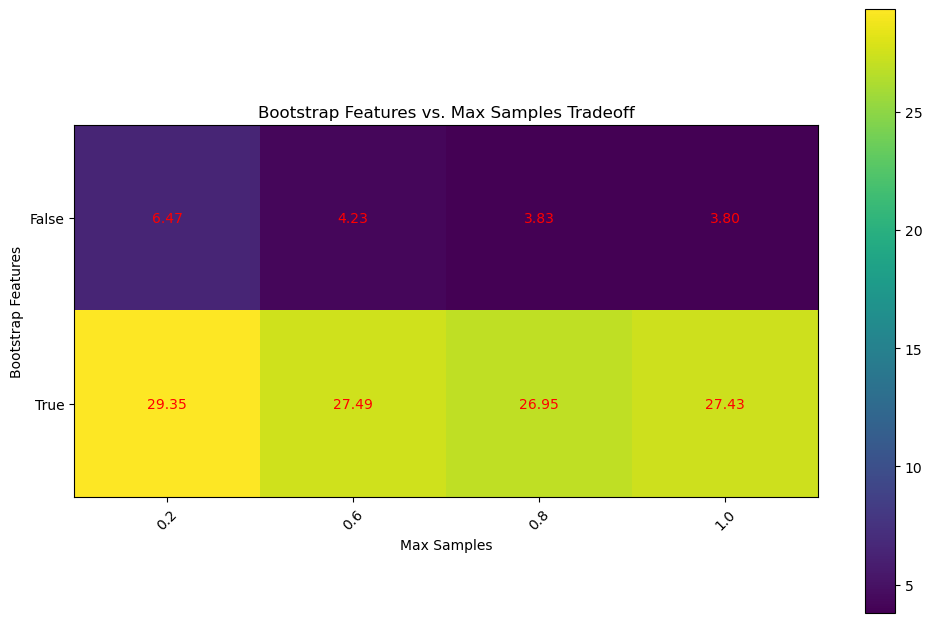

In [85]:
# We decided to use the product package to produce combinations between the 2 lists
from itertools import product

# # Creating 2 lists of bootstrap features and max samples
b_features = [False, True]  
m_samples = [0.2, 0.6, 0.8, 1.0]  

# Next, we create an output array to store our output in
output = np.zeros((len(b_features), len(m_samples)))

# generate combinations of bootstrap_features and max_samples
c_product = product(b_features, m_samples)

# Loop through the combination product
for (b, m) in c_product:
    reg_g2 = BaggingRegressor(bootstrap_features=b, max_samples=m, random_state=250)
    bag_fit_g2 = reg_g2.fit(BSHX_train_g2, BSHy_train_g2)
    BSHy_pred_g2 = bag_fit_g2.predict(BSHX_test_g2)
    
    rmse = np.sqrt(mean_squared_error(BSHy_test_g2, BSHy_pred_g2))
    i = b_features.index(b)
    j = m_samples.index(m)
    output[i, j] = rmse

# our group decided to use a heatmap to show the results
plt.figure(figsize=(12, 8))
plt.imshow(output, interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(len(m_samples)), m_samples, rotation=45)
plt.yticks(np.arange(len(b_features)), ['False', 'True'])
plt.xlabel('Max Samples')
plt.ylabel('Bootstrap Features')
plt.title('Bootstrap Features vs. Max Samples Tradeoff')

# We also decided to add RMSE details on the plot for clarity
for i in range(len(b_features)):
    for j in range(len(m_samples)):
        plt.annotate(f'{output[i, j]:.2f}', (j, i), color='r', # round to 2 digits
                     ha='center', va='center', fontsize=10)

plt.show();

## Explain the graph in detail. Specifically, describe the trade off between bootstrap features and max samples (1 paragraph at least, 1.5) 

The heatmap representing the trade-off between bootsrap features and max samples shows a significant performance trade-off between the two parameters.
Indeed, the model performs a lot better when bootstrap features is set to False compared to when it is set to True, regardless of the values chosen for max_samples. This phenomenon may be attributed to the presence of a relatively large sample size, rendering bootstrapping unnecessary and, in fact, detrimental to prediction accuracy.

Furthermore, we also notice that as the max sample size increases, the RMSE decreases. This makes sense since we are increasing the number of features to train each tree/estimator, which results in better model performance.